In [48]:
ID = '010'

# Prediction result

In [49]:
import re
import pandas as pd

# Initialize lists to store timestamps and average values
timestamps = []
averages = []

# Read the data from the file
with open(f'{ID}/dl_engine_result_{ID}.txt', 'r') as file:
    data = file.readlines()

# Extract the prediction labels sand timestamps from each line
buffer = " "
for line in data:
    buffer += line.strip() + " "
    match = re.search(r'Prediction Time: (.*?), Prediction Label: \[\[(.*?)\]\]', buffer)
    if match:
        timestamp = match.group(1)
        labels = match.group(2).split()
        average = sum([float(x) for x in labels]) / len(labels)
        timestamps.append(timestamp)
        averages.append(average)
        buffer = " "  # Reset buffer after a successful match

# Create a dataframe with the extracted data
df_predictions = pd.DataFrame({'timestamp': timestamps, 'average': averages})
df_predictions['average'] = df_predictions['average'].clip(0, 1)

# Display the dataframe
print(df_predictions)

# df_predictions['timestamp'] = pd.to_datetime(df_predictions['timestamp'])
# plt = df_predictions.plot(y='timestamp', title='Average prediction value over time')
# plt.show()

                    timestamp   average
0     2025-03-07 12:58:57.170  0.170893
1     2025-03-07 12:58:57.207  0.291551
2     2025-03-07 12:58:57.488  0.209543
3     2025-03-07 12:58:57.500  0.234381
4     2025-03-07 12:58:57.508  0.231860
...                       ...       ...
2235  2025-03-07 13:22:31.173  0.214654
2236  2025-03-07 13:22:32.350  0.214654
2237  2025-03-07 13:22:33.506  0.214654
2238  2025-03-07 13:22:34.682  0.214654
2239  2025-03-07 13:22:35.880  0.214654

[2240 rows x 2 columns]


# Glove data

In [50]:
import pandas as pd

# Load the CSV file, skipping the first line
df_manual_prime2 = pd.read_csv(f'{ID}/manual_prime2_logger-{ID}.csv', skiprows=1, low_memory=False)

# Extract the timestamp from the first column and add it as a new column
df_manual_prime2['timestamp'] = df_manual_prime2.iloc[:, 0].str.extract(r'\[(.*?)\]')

# Extract the fingerID column
df_manual_prime2['fingerID'] = df_manual_prime2.iloc[:, 1]

# Filter out rows where fingerID is 0
df_manual_prime2 = df_manual_prime2[df_manual_prime2['fingerID'] != 0]

# Filter columns that contain "bending_normalized" in their name
bending_normalized_columns = [col for col in df_manual_prime2.columns if 'pip_joint_finger_bending_normalized' in col or 'dip_joint_finger_bending_normalized' in col]

# Create a DataFrame with the timestamp and the filtered columns
df_bending_normalized = df_manual_prime2[['timestamp', 'fingerID'] + bending_normalized_columns]

# Convert the bending_normalized columns to float
for col in bending_normalized_columns:
    df_bending_normalized[col] = pd.to_numeric(df_bending_normalized[col], errors='coerce')

# Display the data of the filtered columns and the average
print(df_bending_normalized)

# Calculate the sum of pip_joint_finger_bending_normalized and dip_joint_finger_bending_normalized for each row
df_bending_normalized['bending_sum'] = (df_bending_normalized[' pip_joint_finger_bending_normalized'] + df_bending_normalized[' dip_joint_finger_bending_normalized'])/2

# Group by timestamp and calculate the average of the bending_sum across all fingers
df_avg_bending = df_bending_normalized.groupby('timestamp')['bending_sum'].mean().reset_index()

# Rename the columns
df_avg_bending.columns = ['timestamp', 'average_bending_sum']

# Display the new DataFrame
print(df_avg_bending)

                      timestamp  fingerID  \
1       2025-03-07 12:58:40.625       1.0   
2       2025-03-07 12:58:40.625       2.0   
3       2025-03-07 12:58:40.625       3.0   
4       2025-03-07 12:58:40.625       4.0   
6       2025-03-07 12:58:40.770       1.0   
...                         ...       ...   
357926  2025-03-07 13:21:39.535       1.0   
357927  2025-03-07 13:21:39.535       2.0   
357928  2025-03-07 13:21:39.535       3.0   
357929  2025-03-07 13:21:39.535       4.0   
357930  2025-03-07 13:21:40.267       NaN   

         pip_joint_finger_bending_normalized  \
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
6                                        0.0   
...                                      ...   
357926                                   0.0   
357927                                   0.0   
357928                     

/var/folders/8z/lyrry3554djbqwn014snlnzc0000gn/T/ipykernel_29206/1796650283.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bending_normalized[col] = pd.to_numeric(df_bending_normalized[col], errors='coerce')
/var/folders/8z/lyrry3554djbqwn014snlnzc0000gn/T/ipykernel_29206/1796650283.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bending_normalized['bending_sum'] = (df_bending_normalized[' pip_joint_finger_bending_normalized'] + df_bending_normalized[' dip_joint_finger_bending_normalized'])

# Game Log

In [51]:
# Read the game log data from the file
with open(f'{ID}/game_log_{ID}.txt', 'r') as file:
    data = file.readlines()

# Create a DataFrame from the sample data
df_game_log = pd.DataFrame(data, columns=['log'])

# Extract the timestamp, description, and STIM code from each log entry
df_game_log['timestamp'] = df_game_log['log'].str.extract(r'(\d{1,2}/\d{1,2}/\d{4} \d{1,2}:\d{2}:\d{2} [APM]{2})')
df_game_log['description'] = df_game_log['log'].str.extract(r': (.*?) \(STIM Code:')
df_game_log['stim'] = df_game_log['log'].str.extract(r'STIM Code: (\d+)').astype(int)

# Display the new DataFrame
print(df_game_log)

                                                   log             timestamp  \
0    3/7/2025 12:59:24 PM: Fruit_1 start (STIM Code...  3/7/2025 12:59:24 PM   
1           3/7/2025 12:59:25 PM: Cue (STIM Code: 2)\n  3/7/2025 12:59:25 PM   
2    3/7/2025 12:59:27 PM: Pacman pass fruit (STIM ...  3/7/2025 12:59:27 PM   
3           3/7/2025 12:59:30 PM: Cue (STIM Code: 2)\n  3/7/2025 12:59:30 PM   
4    3/7/2025 12:59:32 PM: Pacman pass fruit (STIM ...  3/7/2025 12:59:32 PM   
..                                                 ...                   ...   
489  3/7/2025 1:21:31 PM: Pacman shoot (STIM Code: ...   3/7/2025 1:21:31 PM   
490          3/7/2025 1:21:31 PM: Cue (STIM Code: 5)\n   3/7/2025 1:21:31 PM   
491  3/7/2025 1:21:32 PM: Ghost_id_1 survived (STIM...   3/7/2025 1:21:32 PM   
492  3/7/2025 1:21:34 PM: Ghost_5 lose (STIM Code: ...   3/7/2025 1:21:34 PM   
493    3/7/2025 1:21:37 PM: Game quit (STIM Code: 9)\n   3/7/2025 1:21:37 PM   

             description  stim  
0     

# Visualization

In [52]:
# Convert timestamps to datetime
df_predictions['timestamp'] = pd.to_datetime(df_predictions['timestamp'])
df_avg_bending['timestamp'] = pd.to_datetime(df_avg_bending['timestamp'])
df_game_log['timestamp'] = pd.to_datetime(df_game_log['timestamp'])

# Merge the two DataFrames on the nearest timestamp
# df_merged = pd.merge_asof(df_predictions.sort_values('timestamp'), df_avg_bending.sort_values('timestamp'), on='timestamp')
df_merged = pd.merge_asof(df_avg_bending.sort_values('timestamp'), df_predictions.sort_values('timestamp'), on='timestamp')
df_merged.columns = ['timestamp', 'prediction_value', 'actual_value']

[(0, 22), (23, 45), (46, 57), (59, 69), (71, 81), (82, 93), (94, 103), (104, 114), (115, 157), (158, 200), (201, 243), (244, 286), (287, 298), (299, 310), (311, 322), (323, 365), (366, 378), (379, 421), (422, 436), (437, 479), (480, 492)]


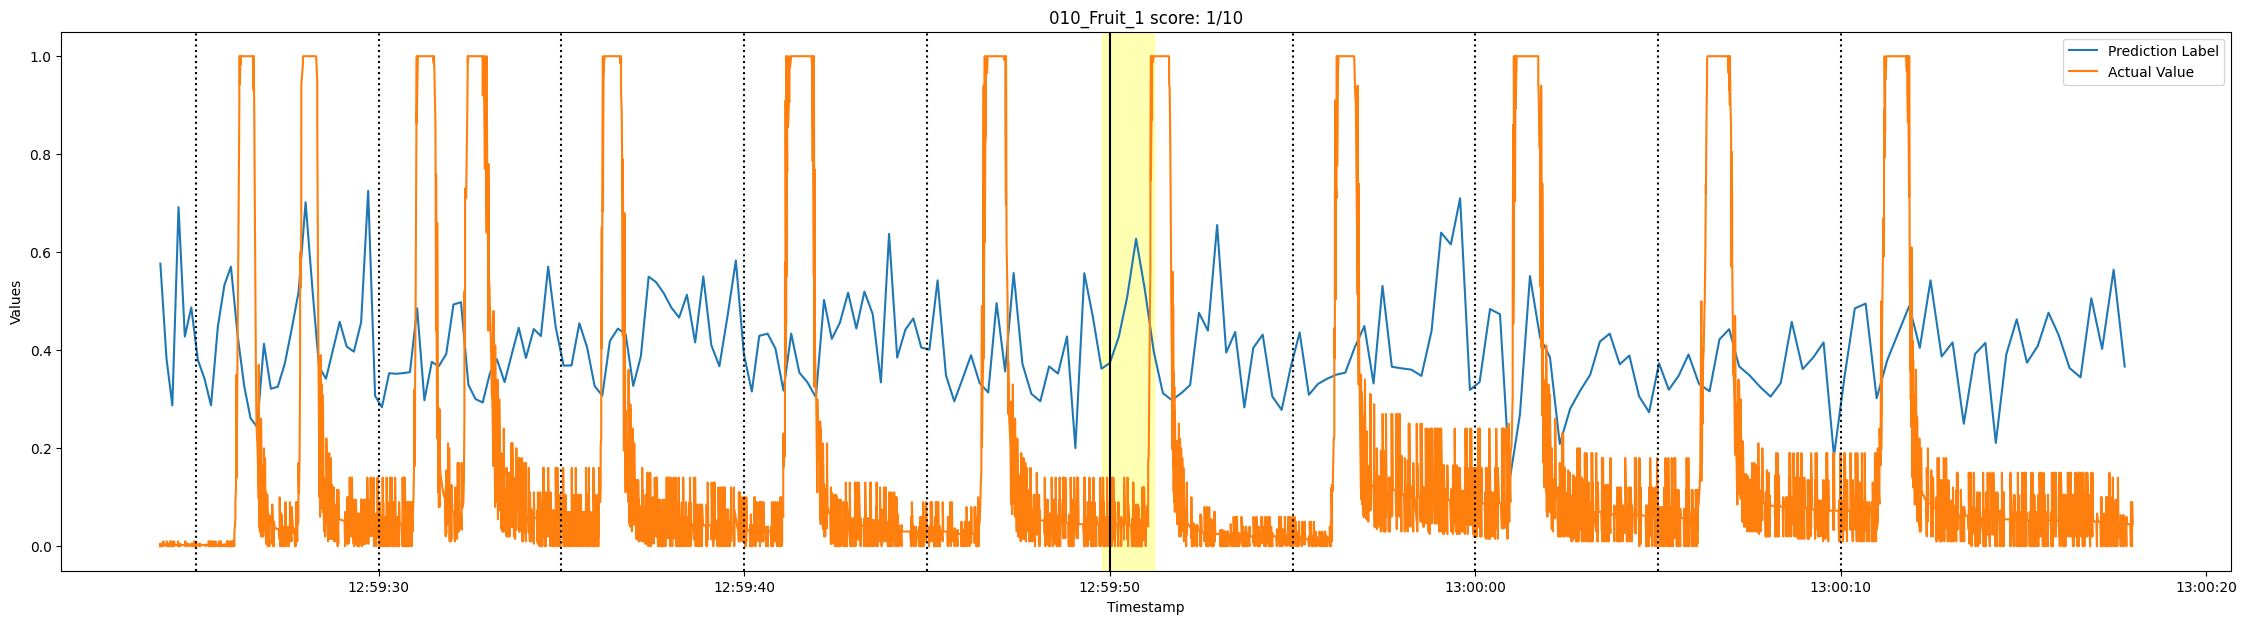

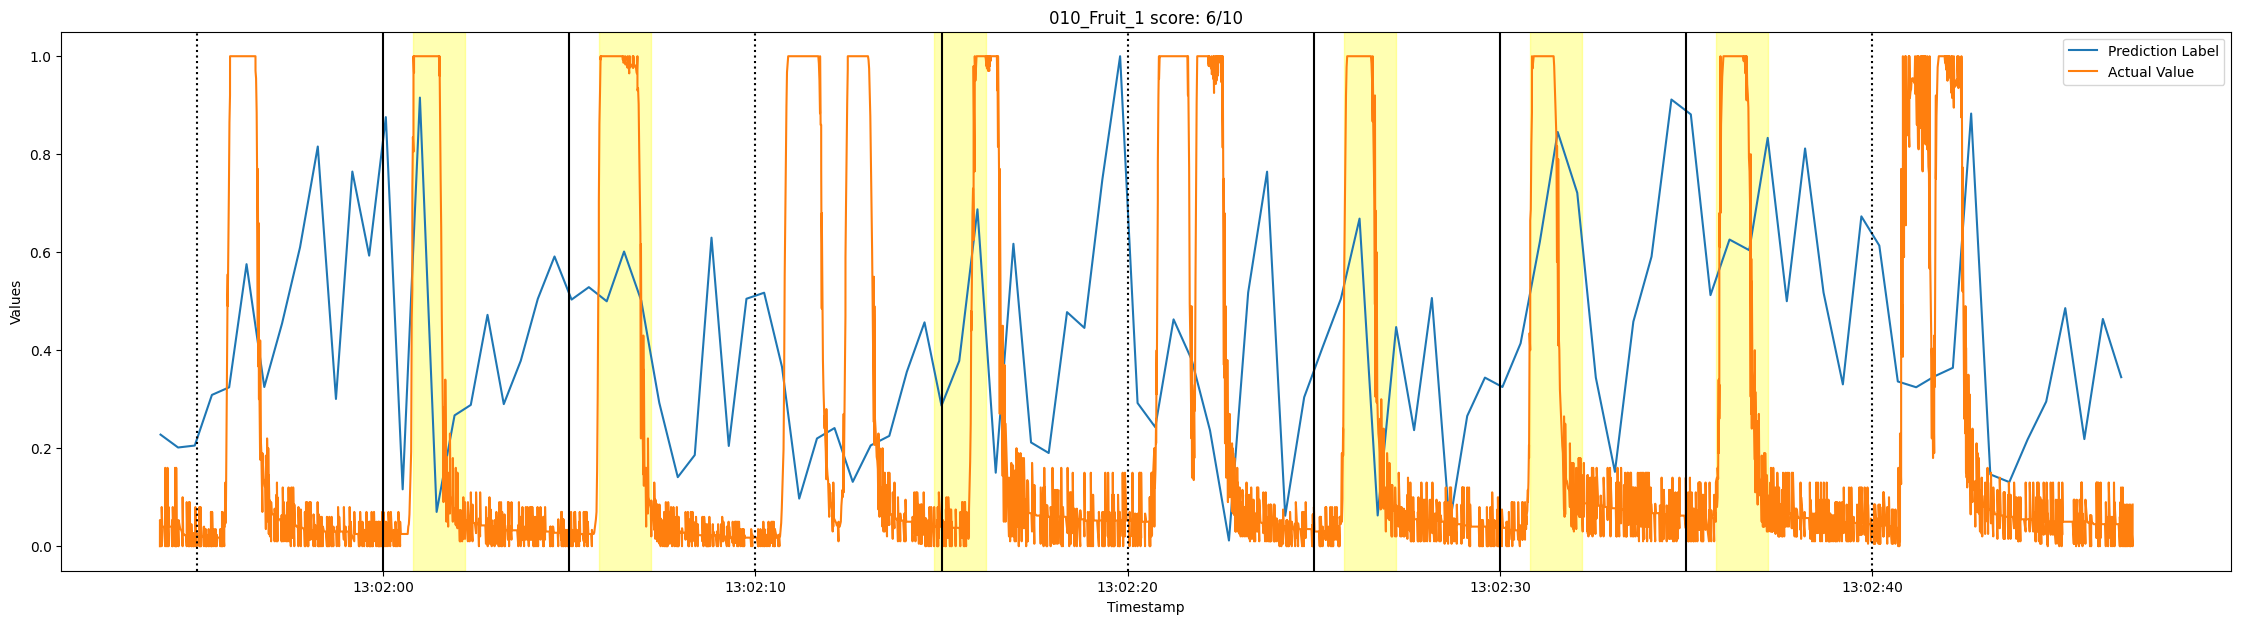

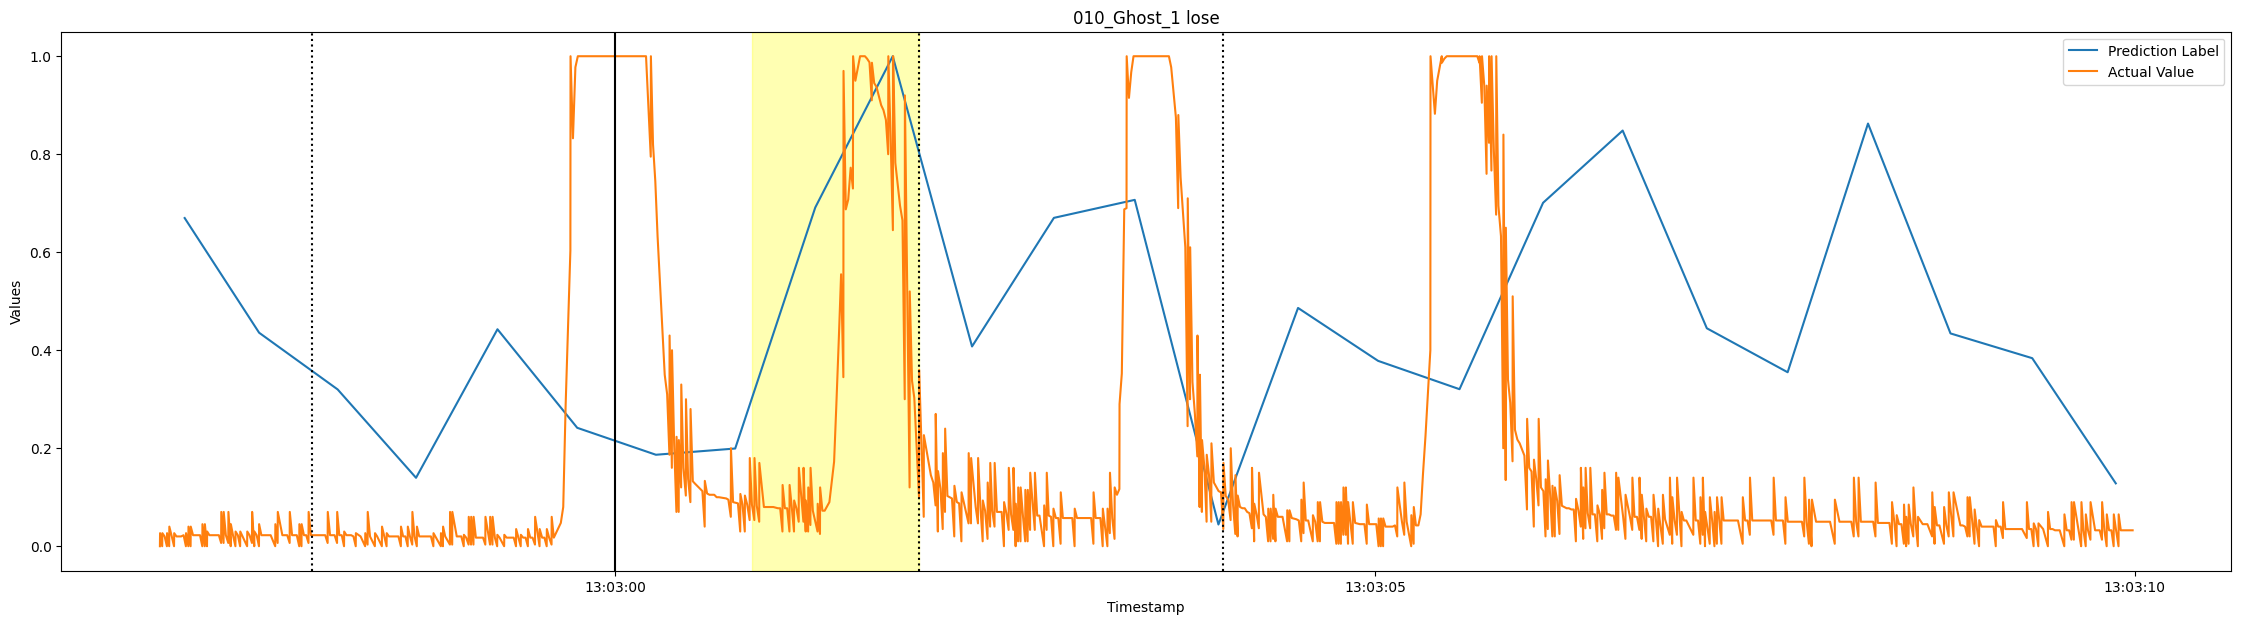

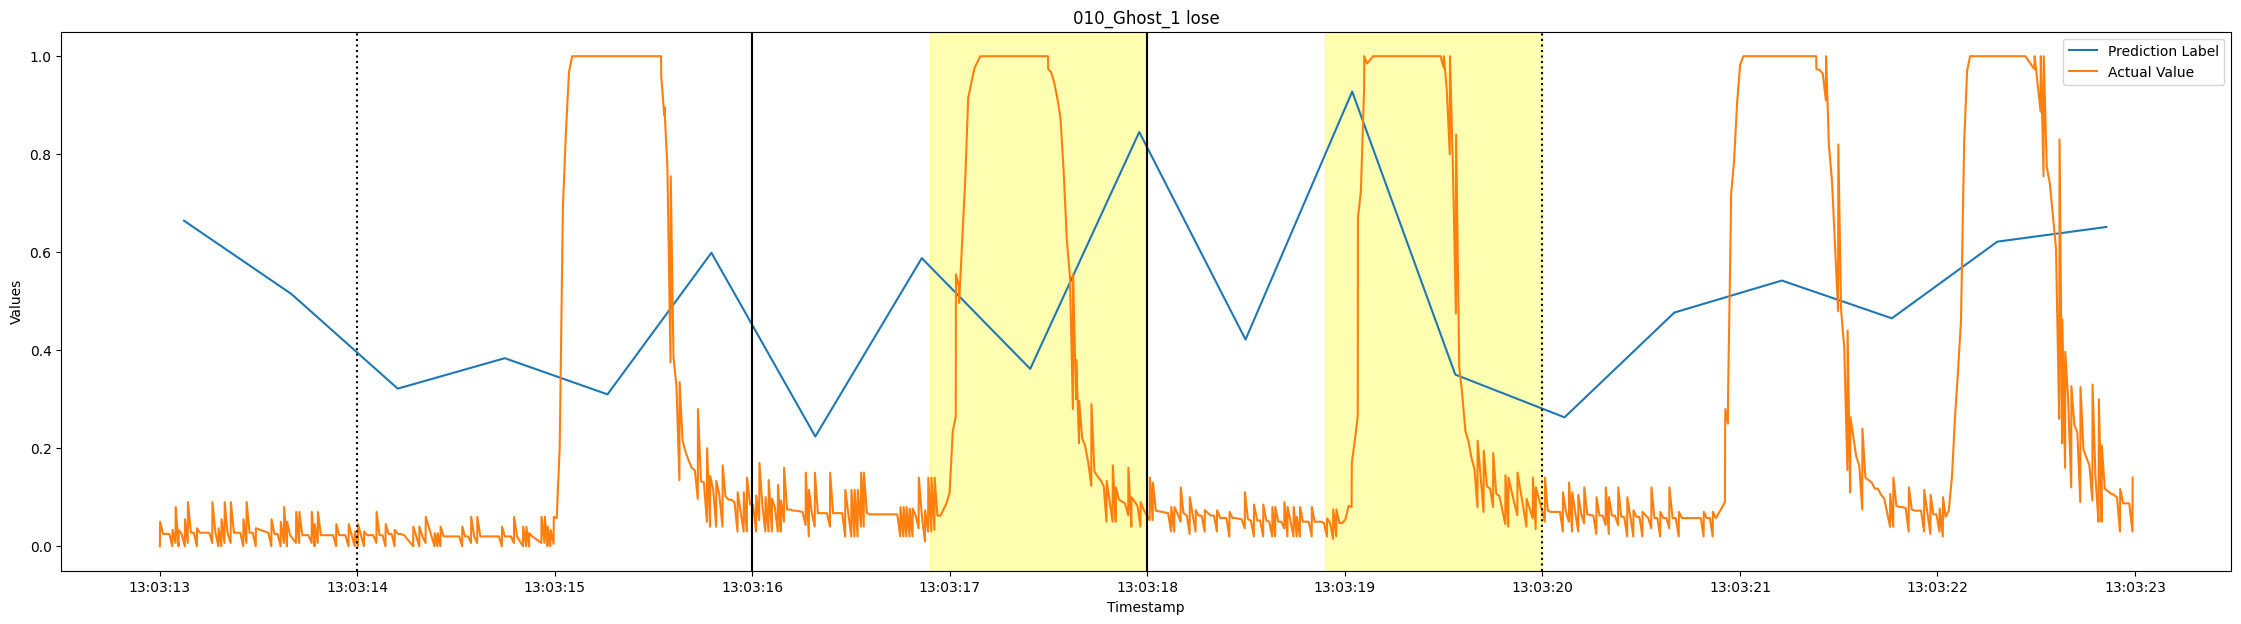

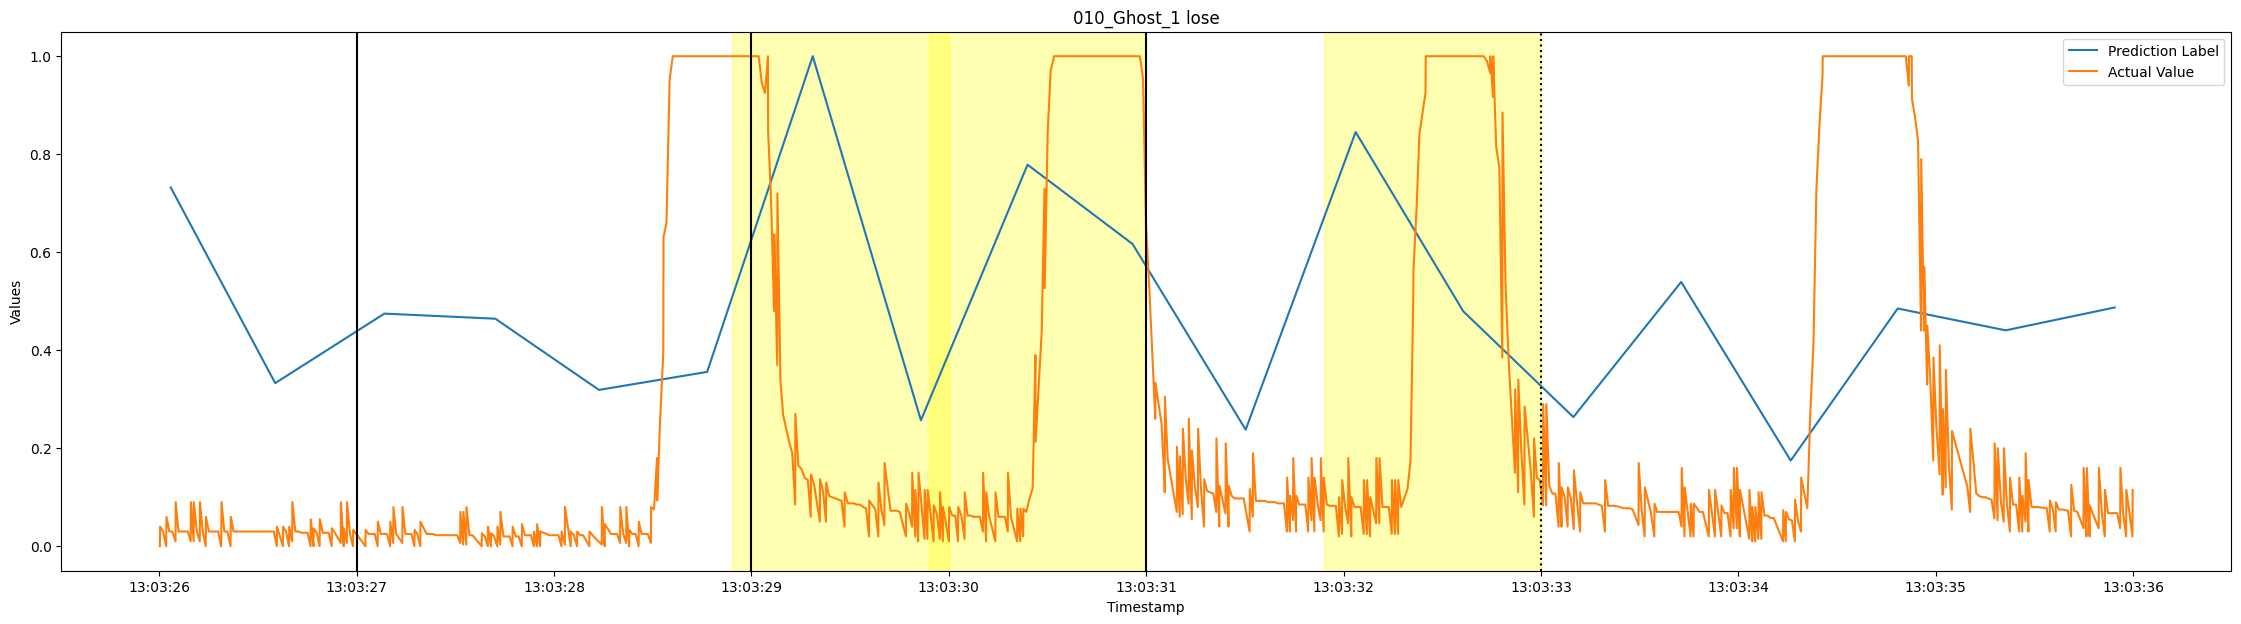

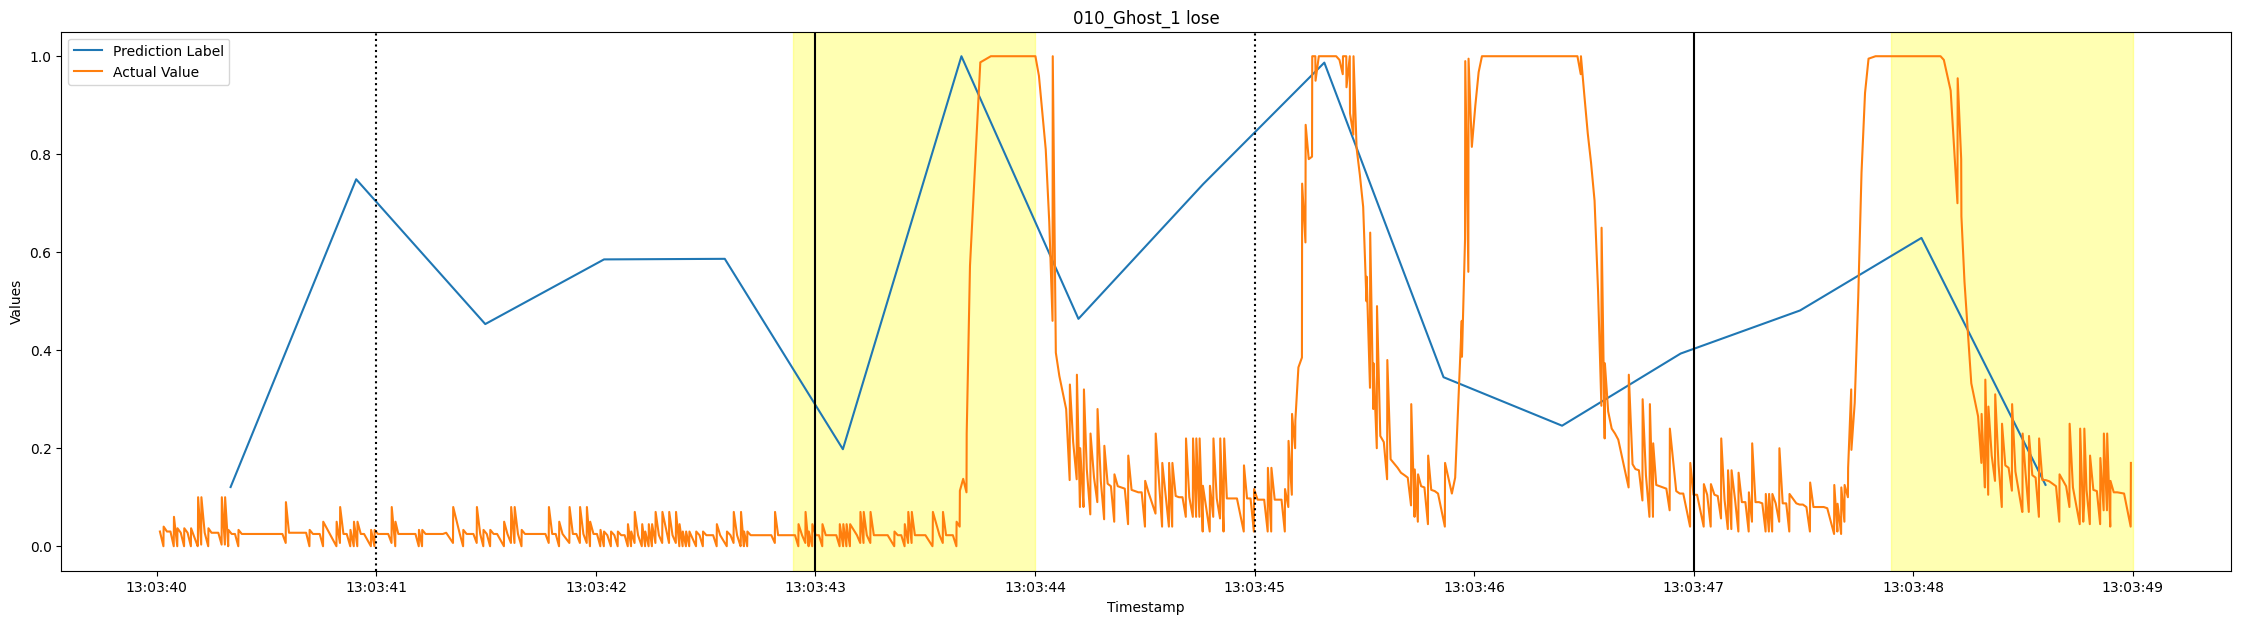

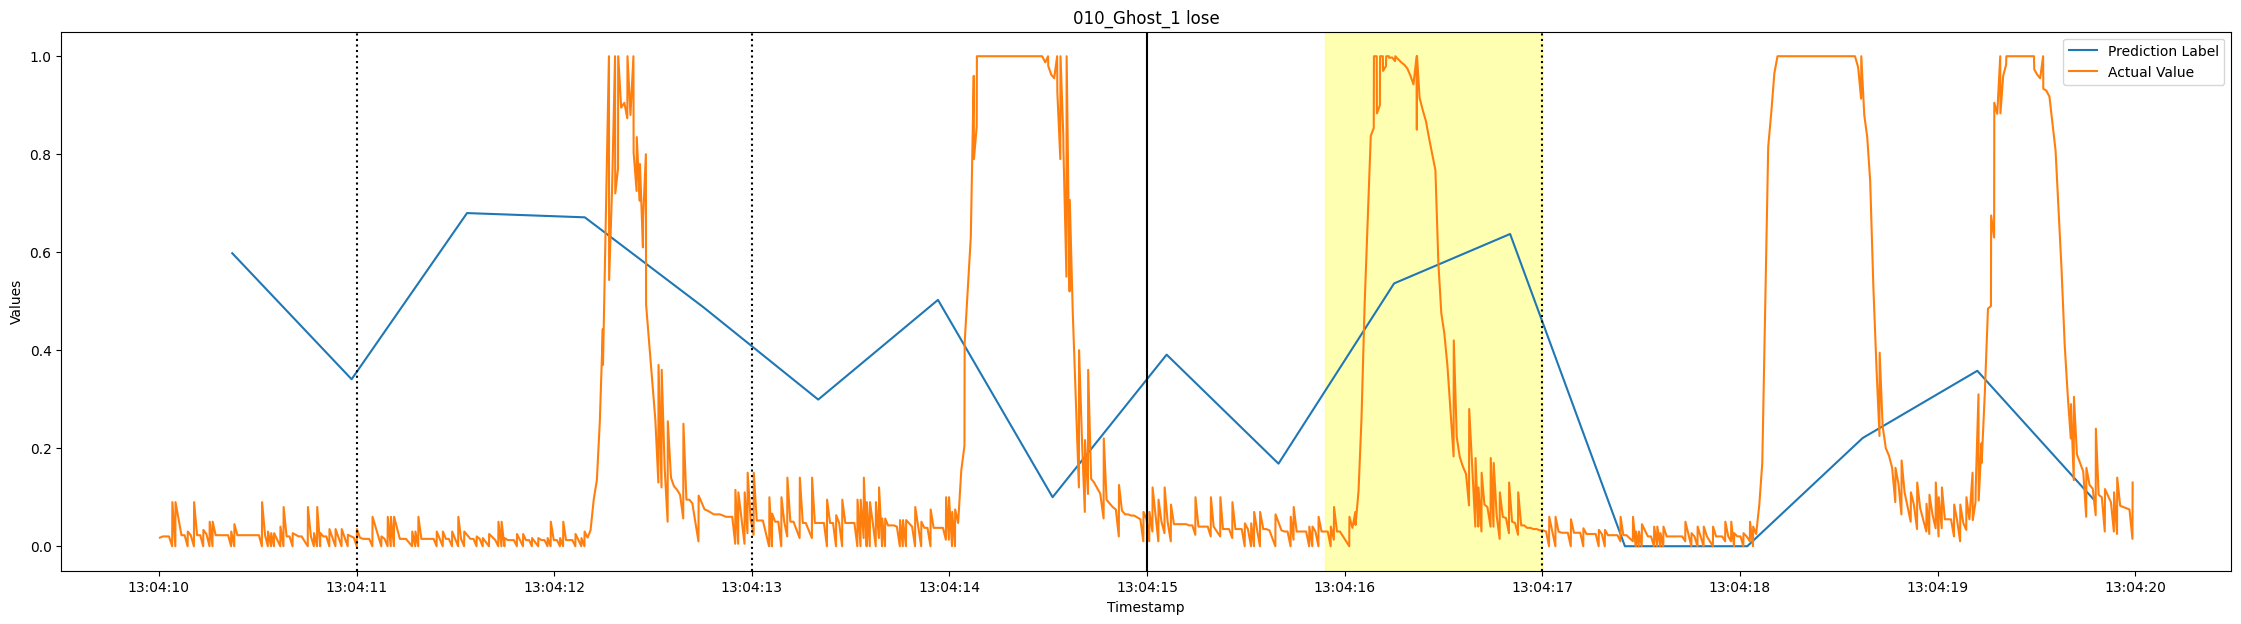

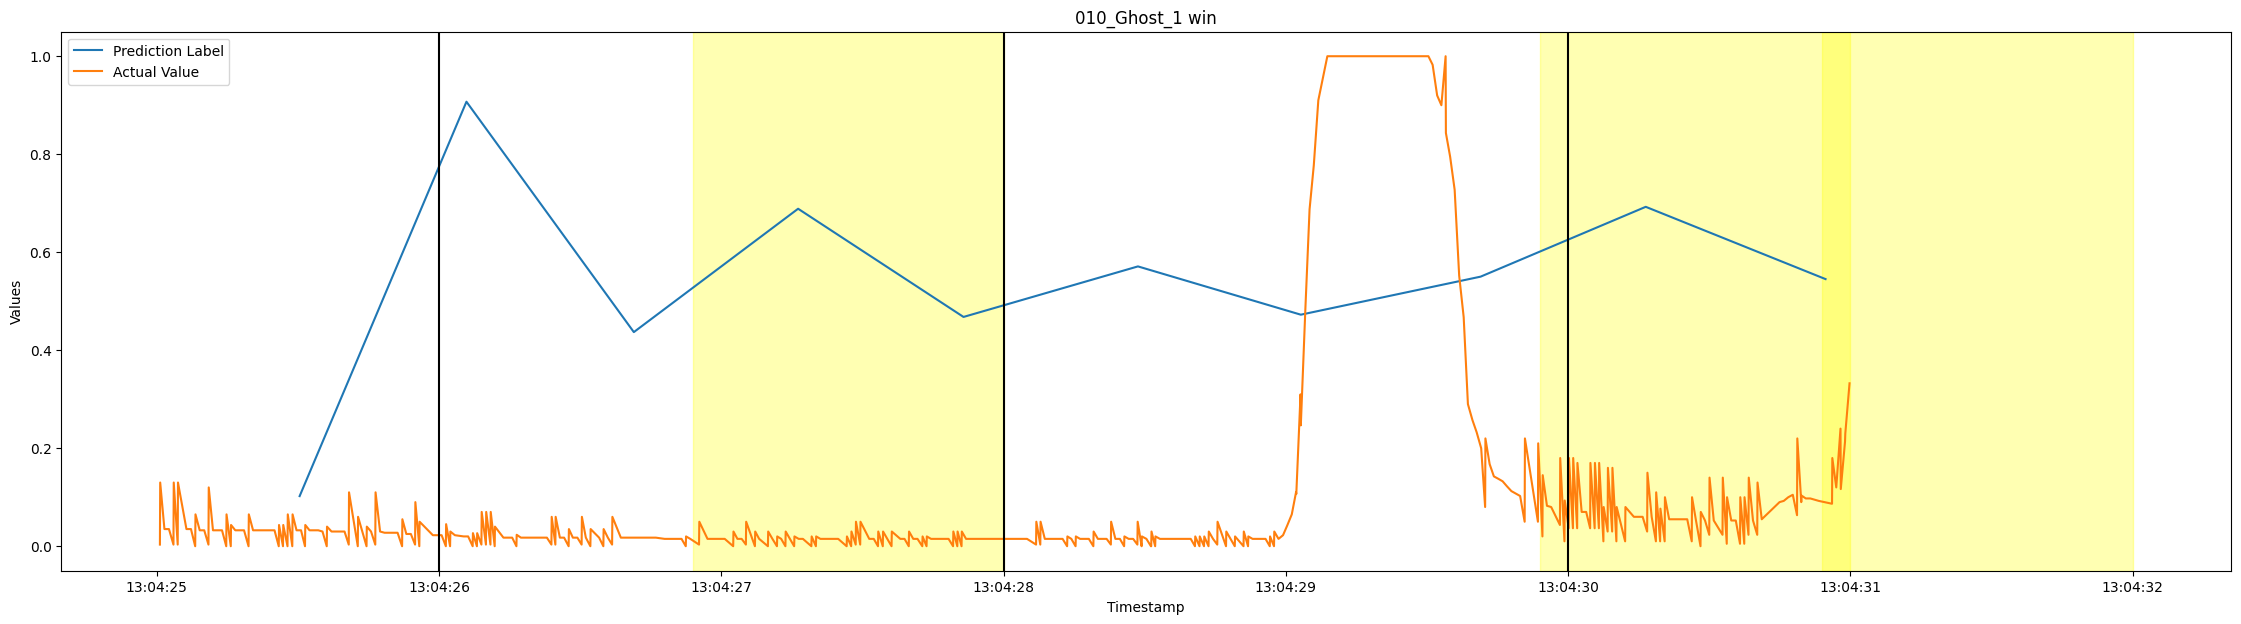

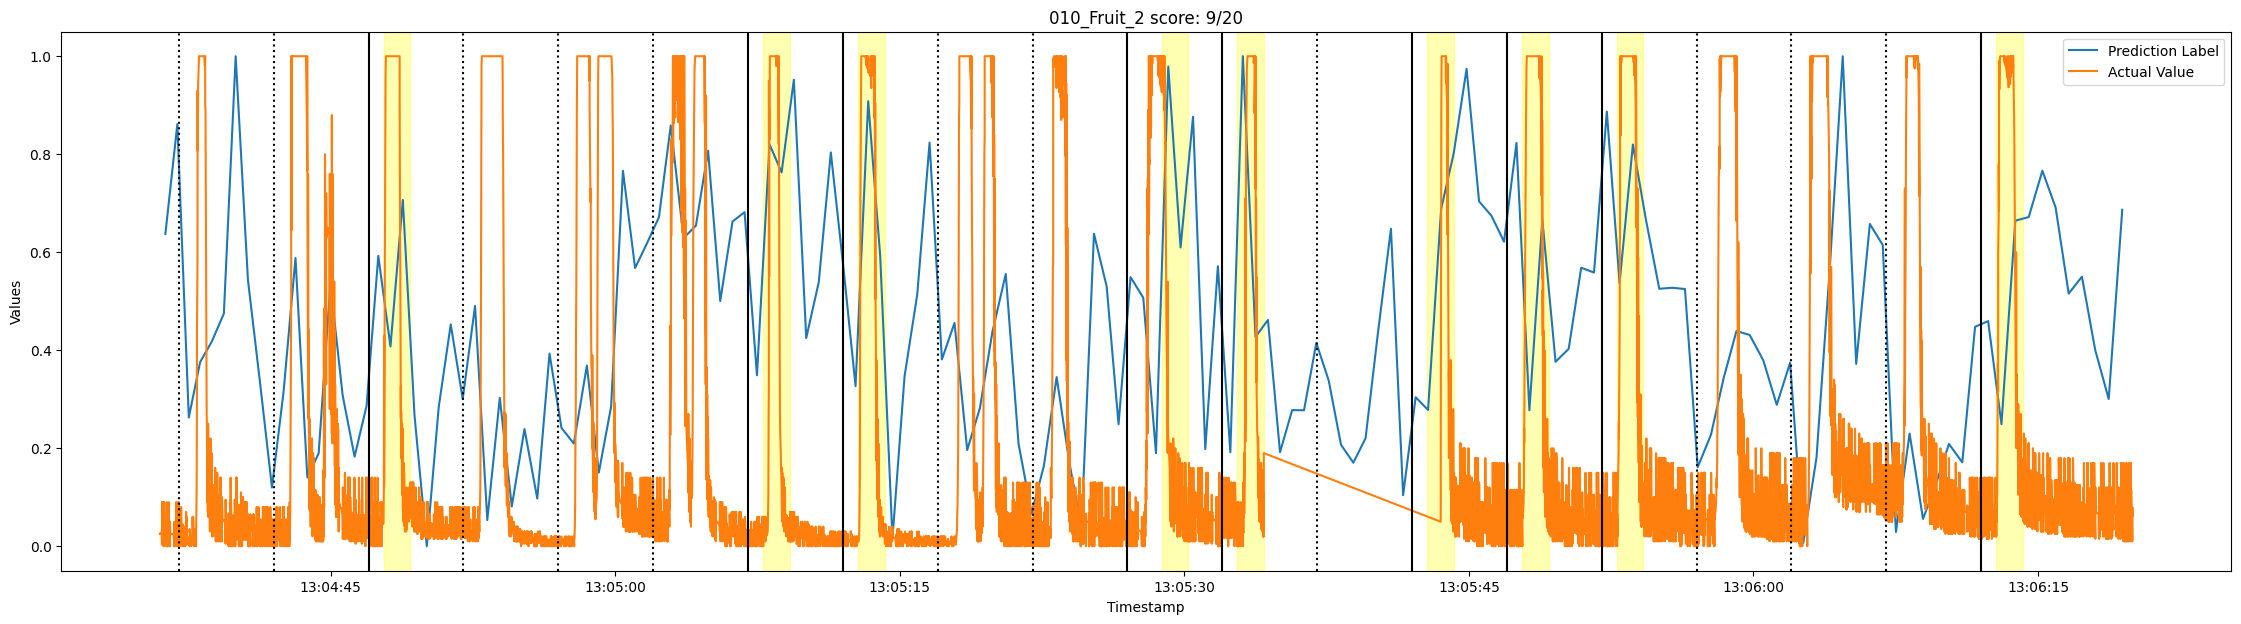

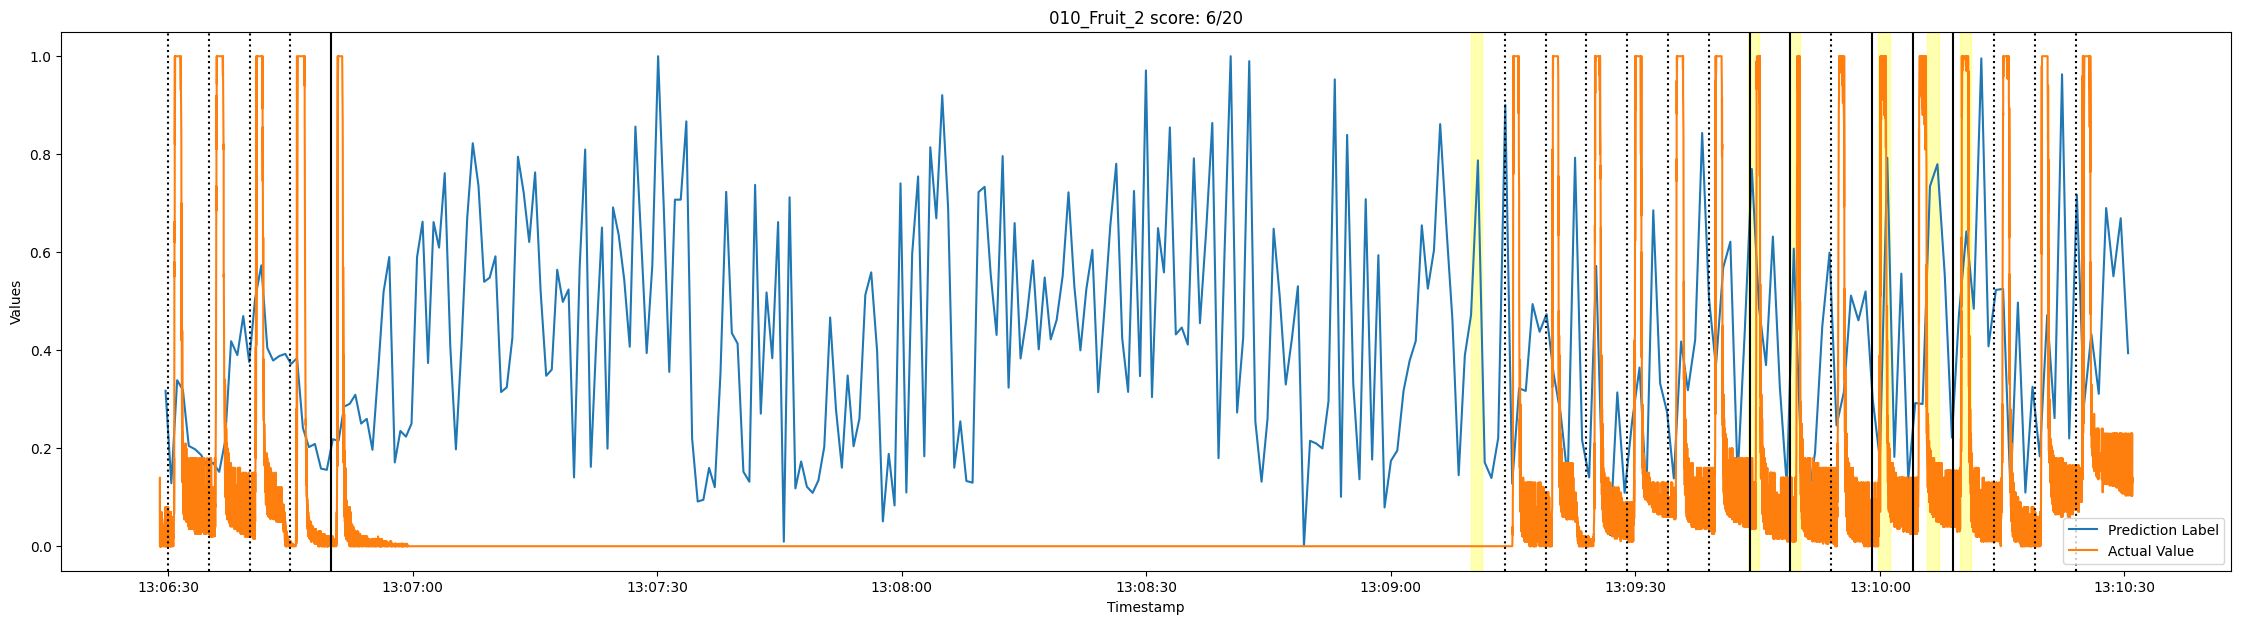

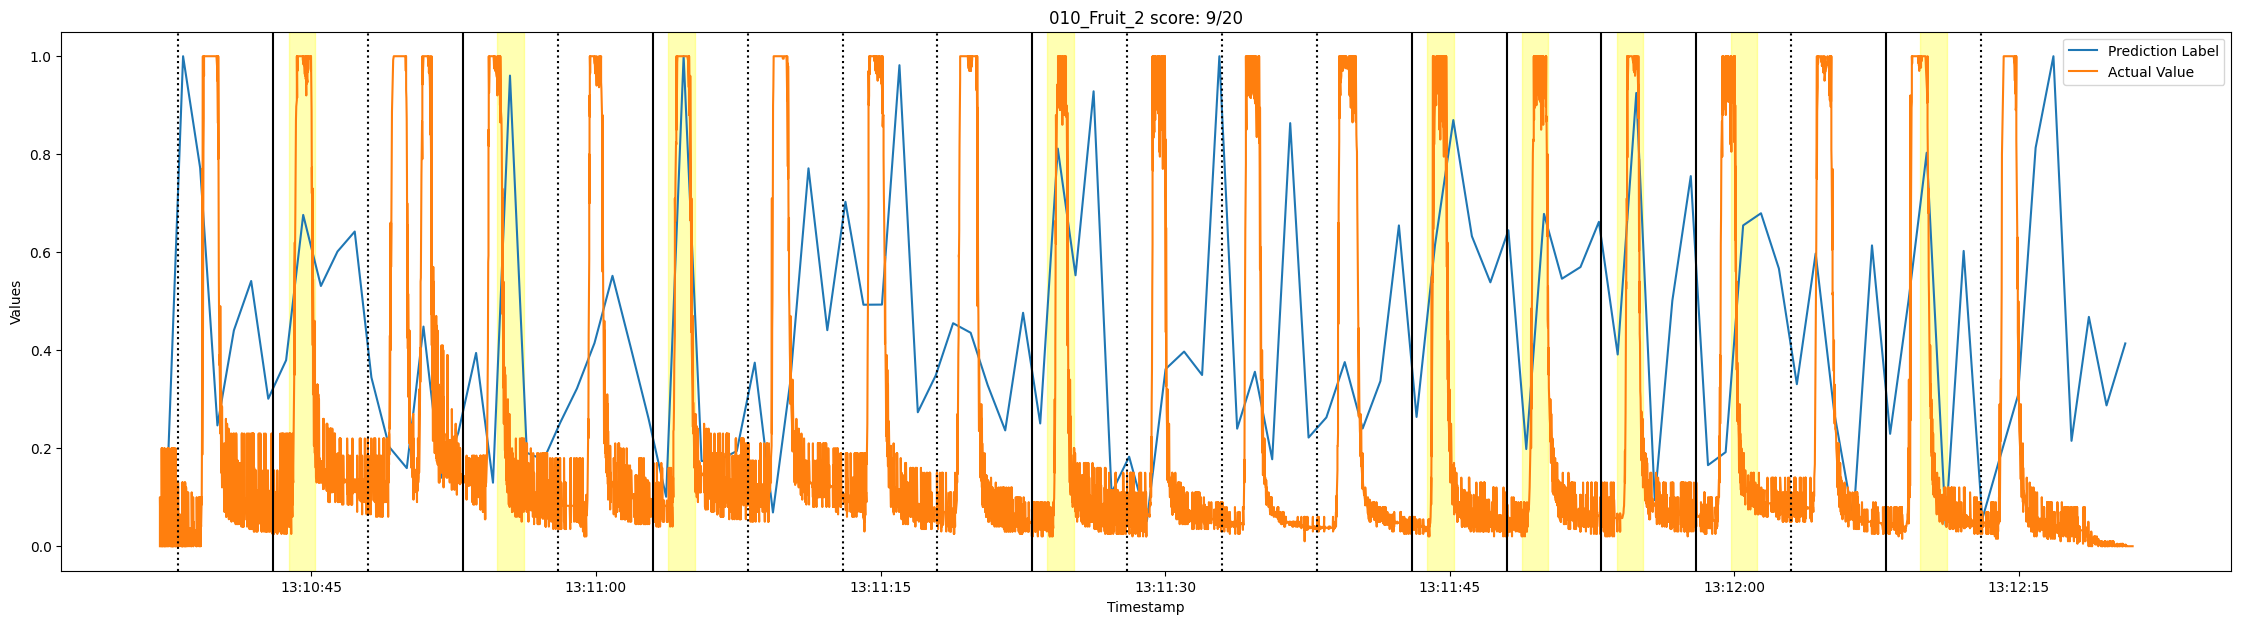

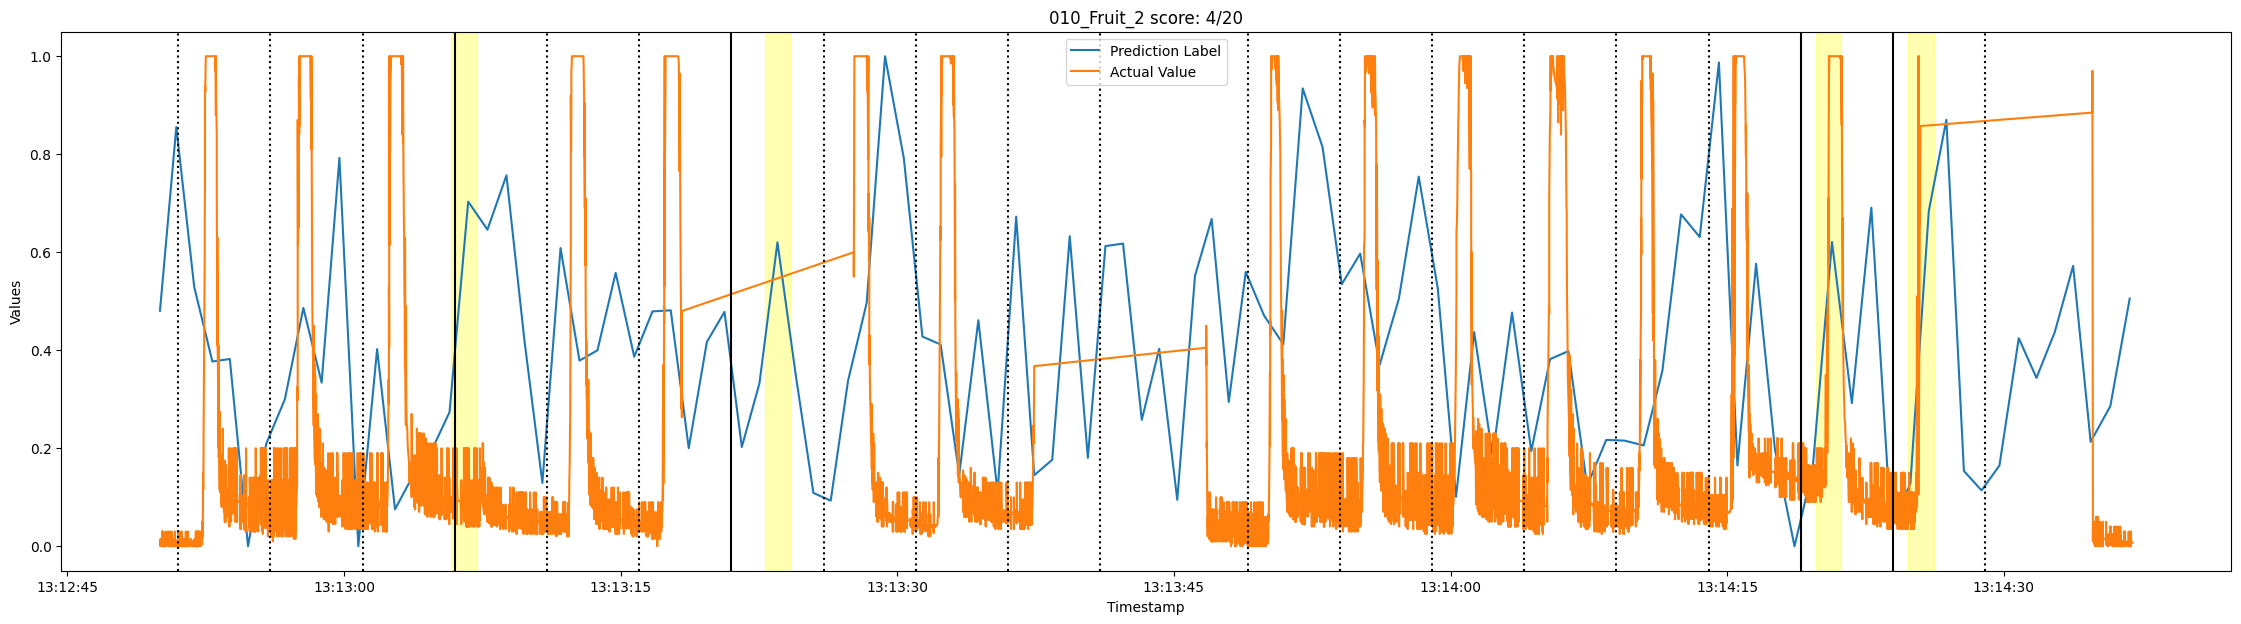

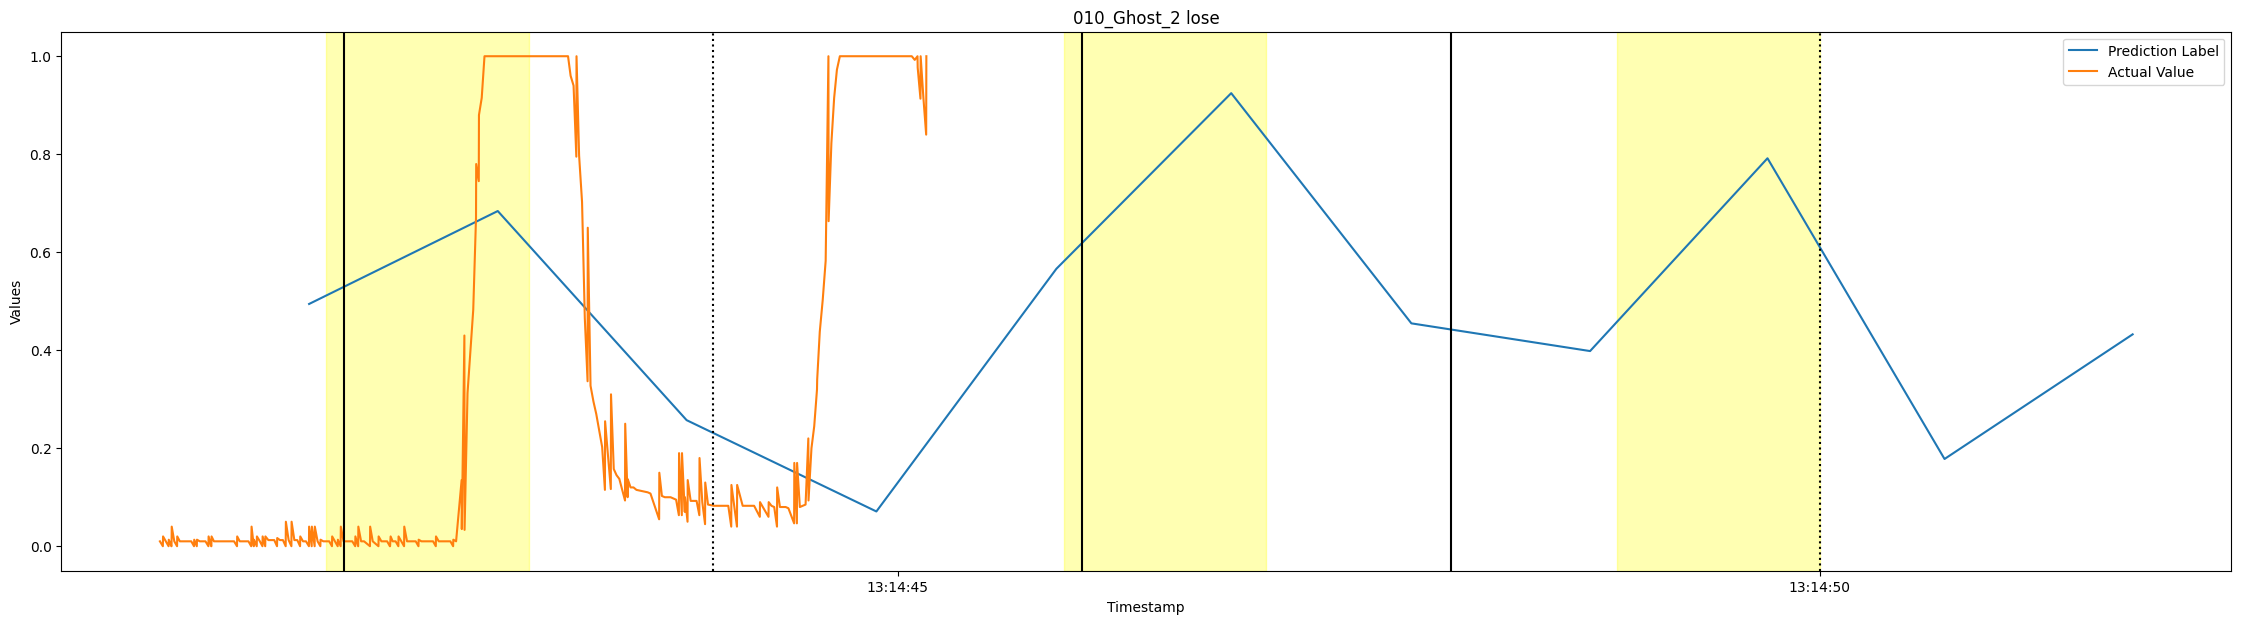

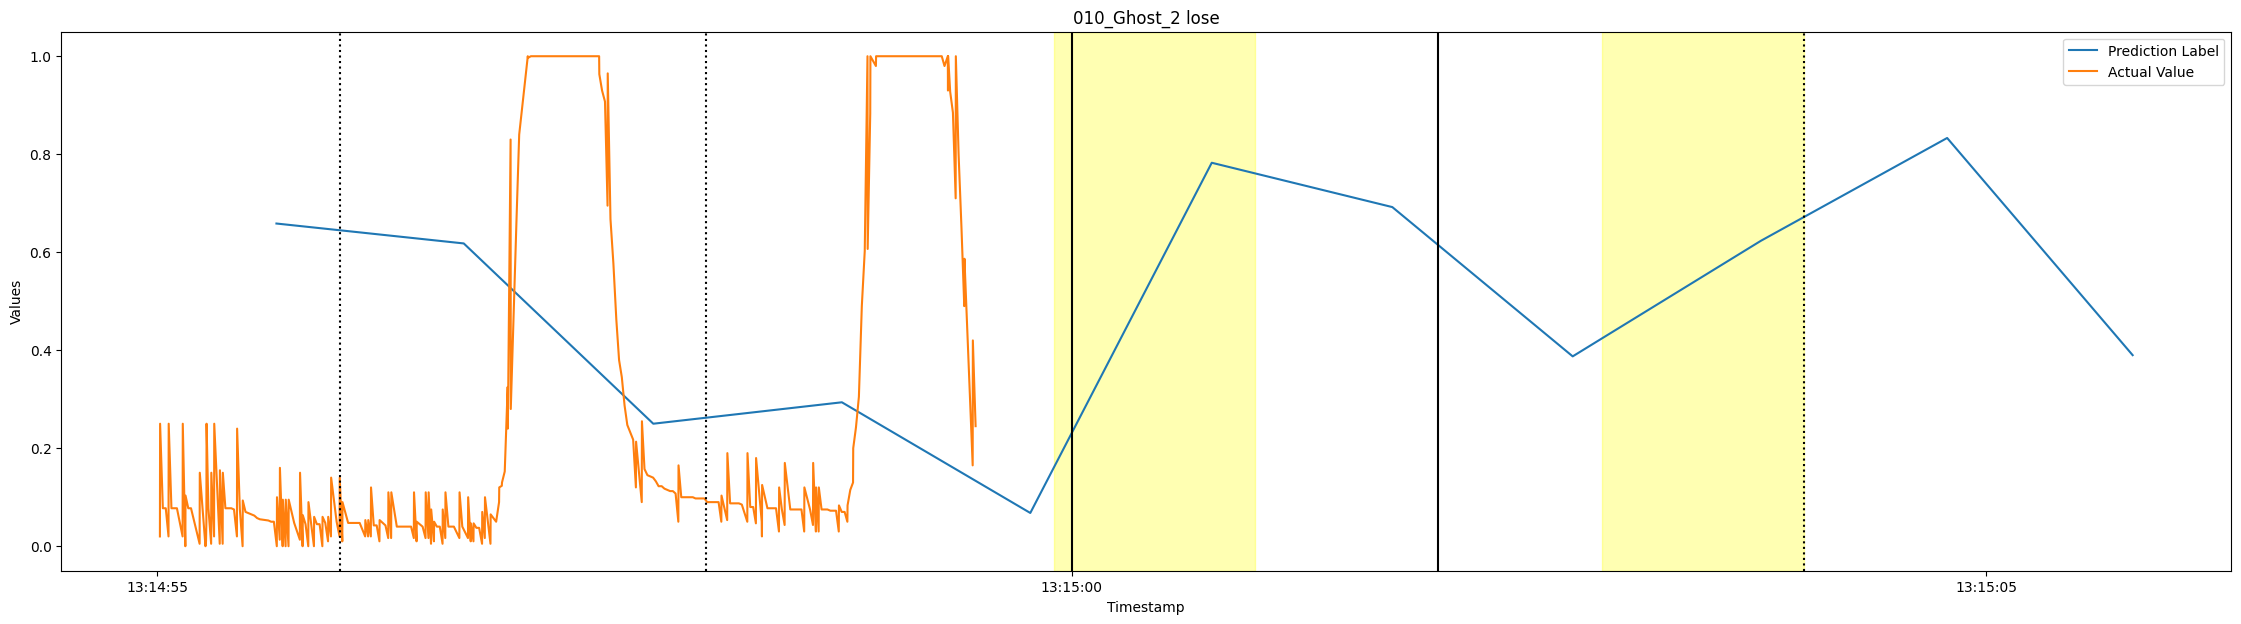

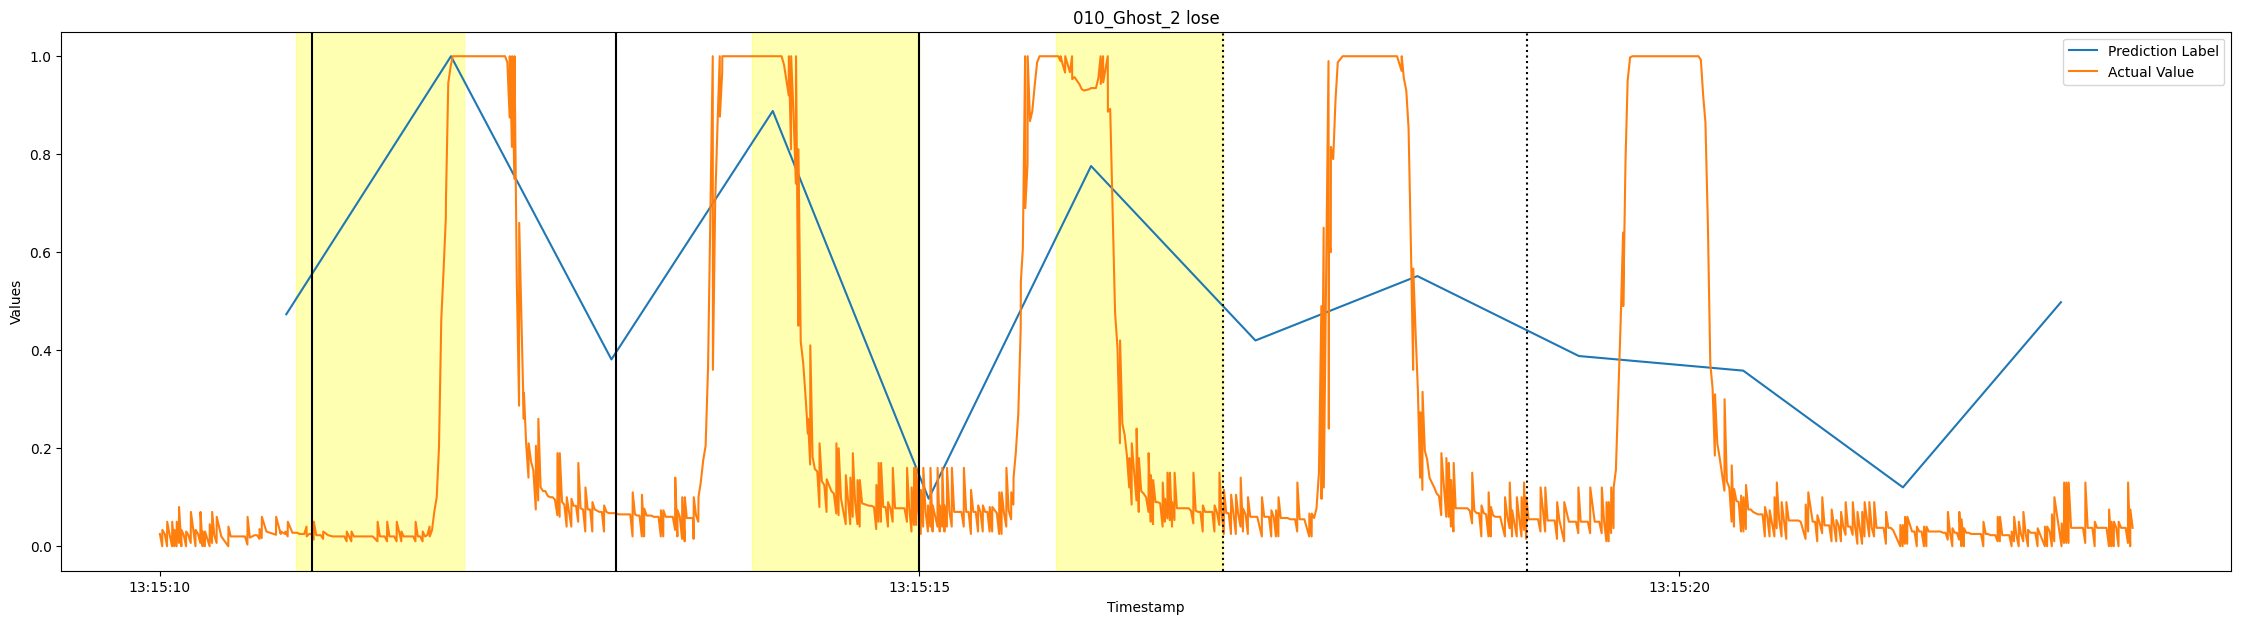

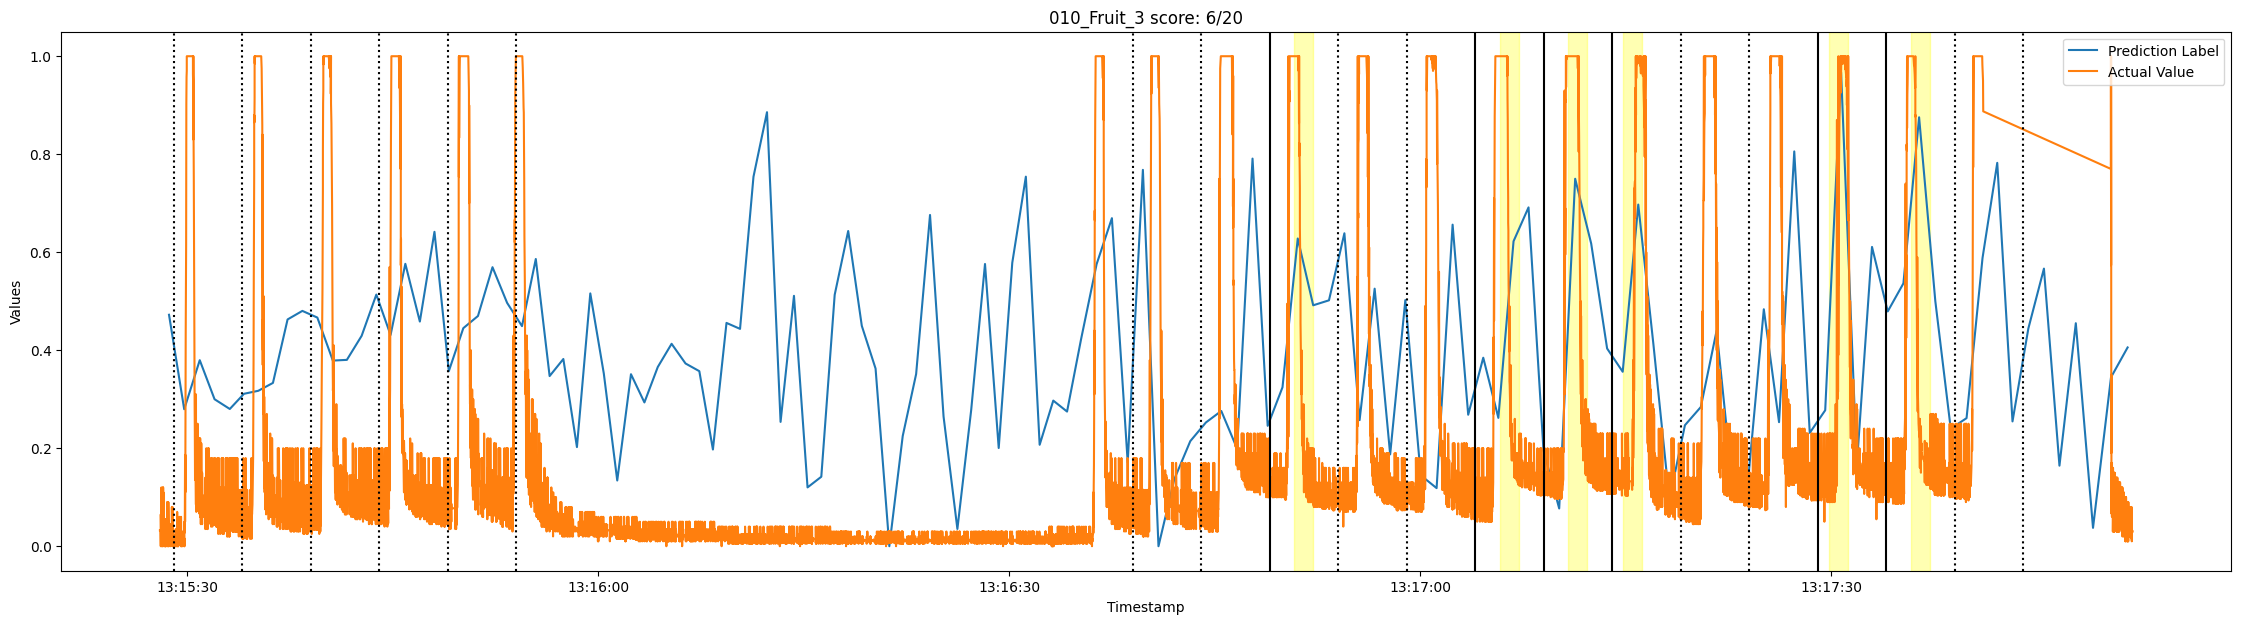

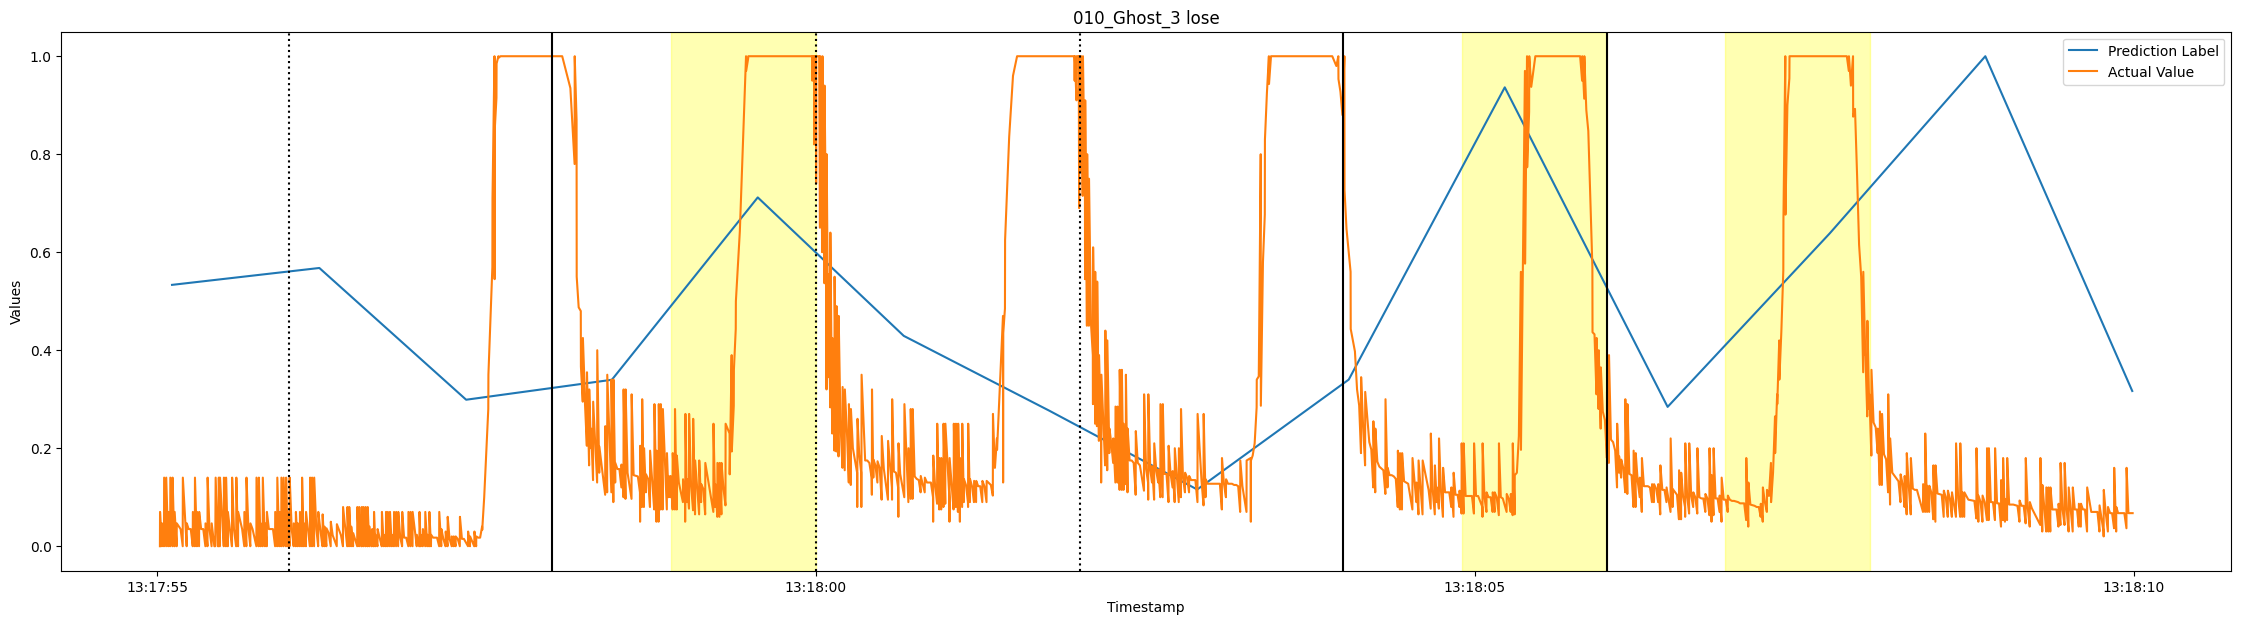

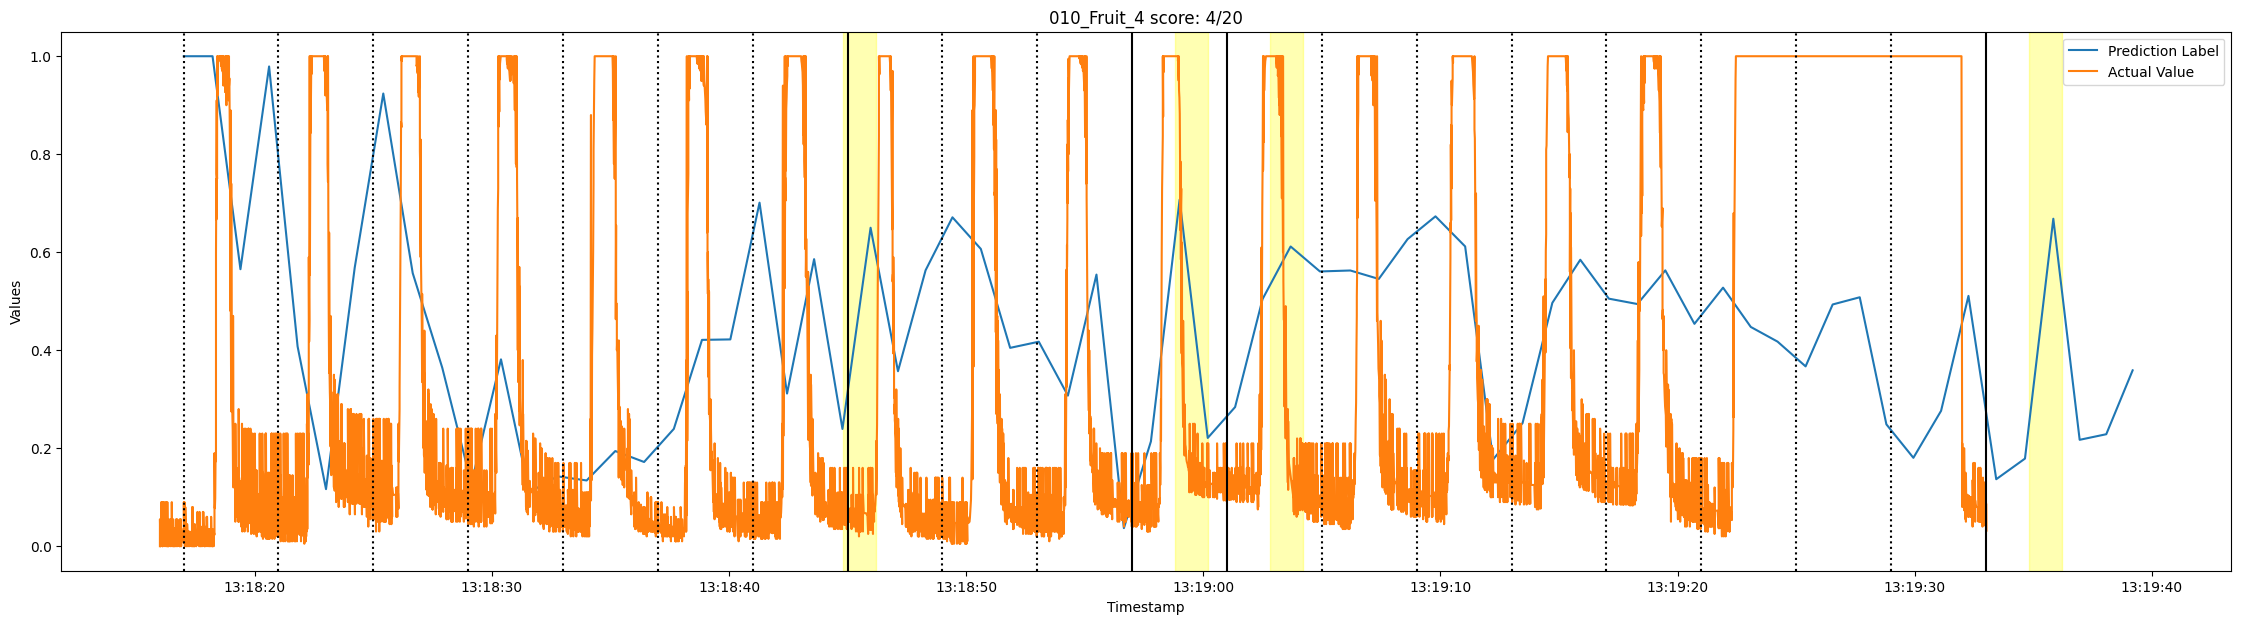

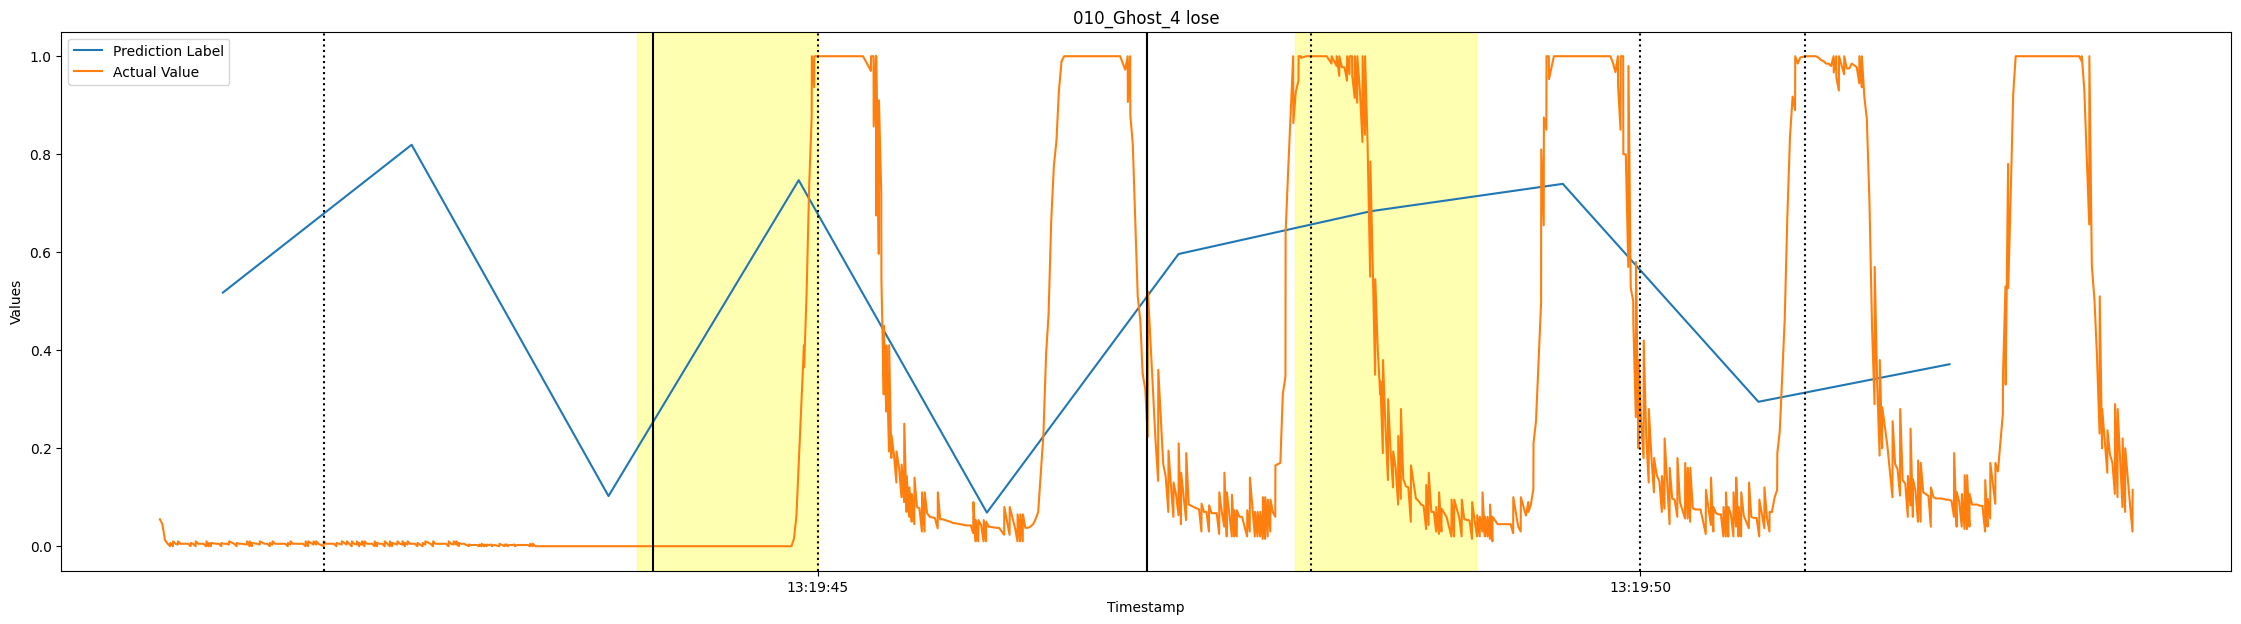

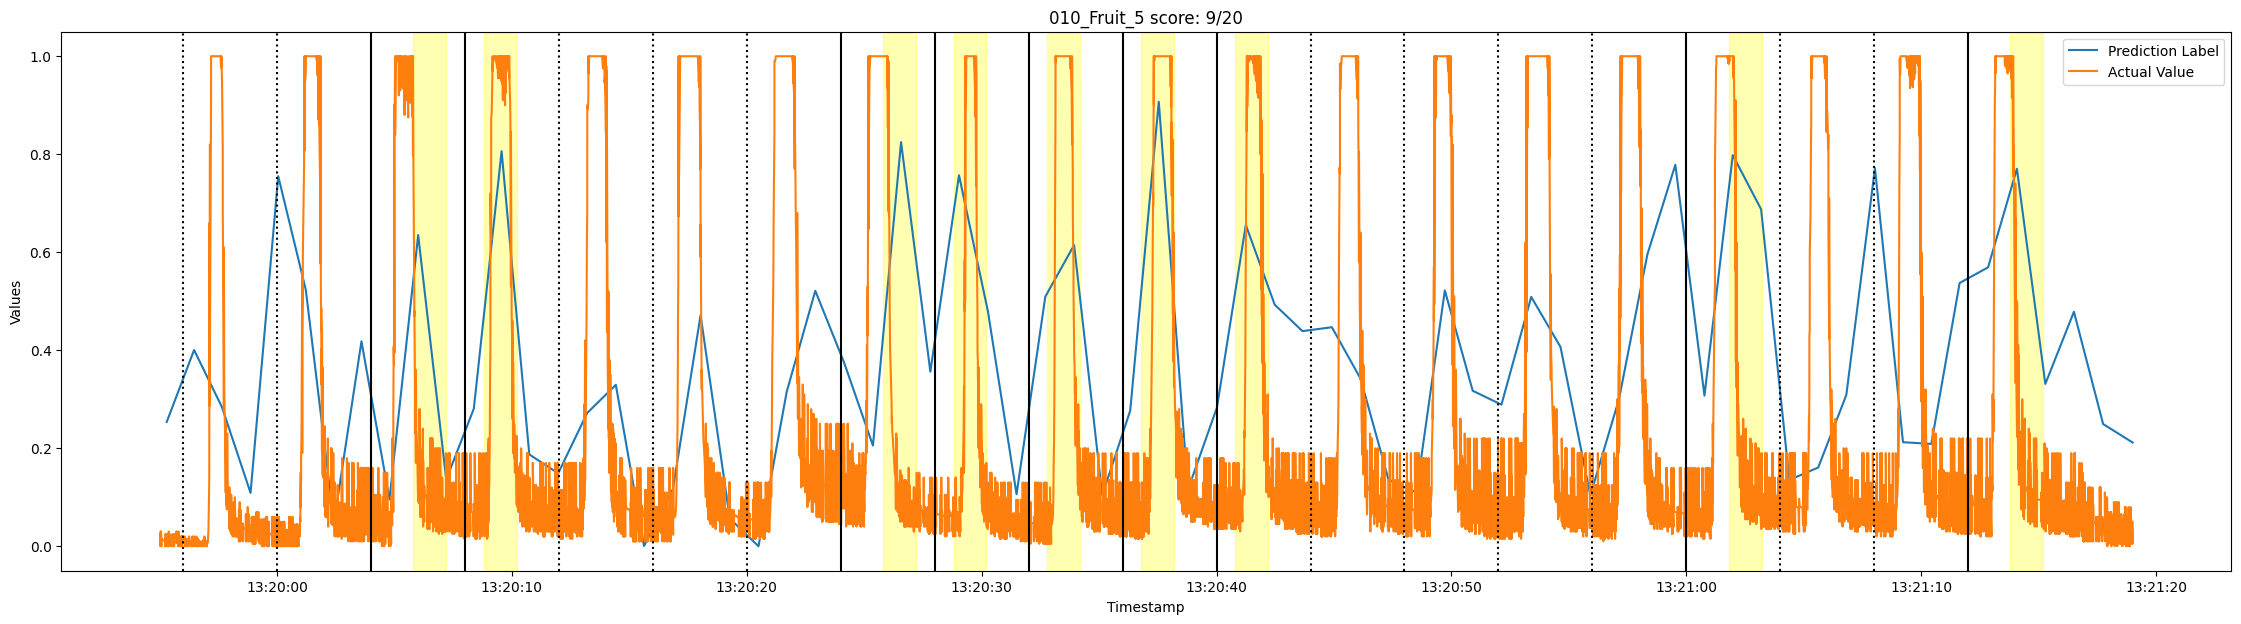

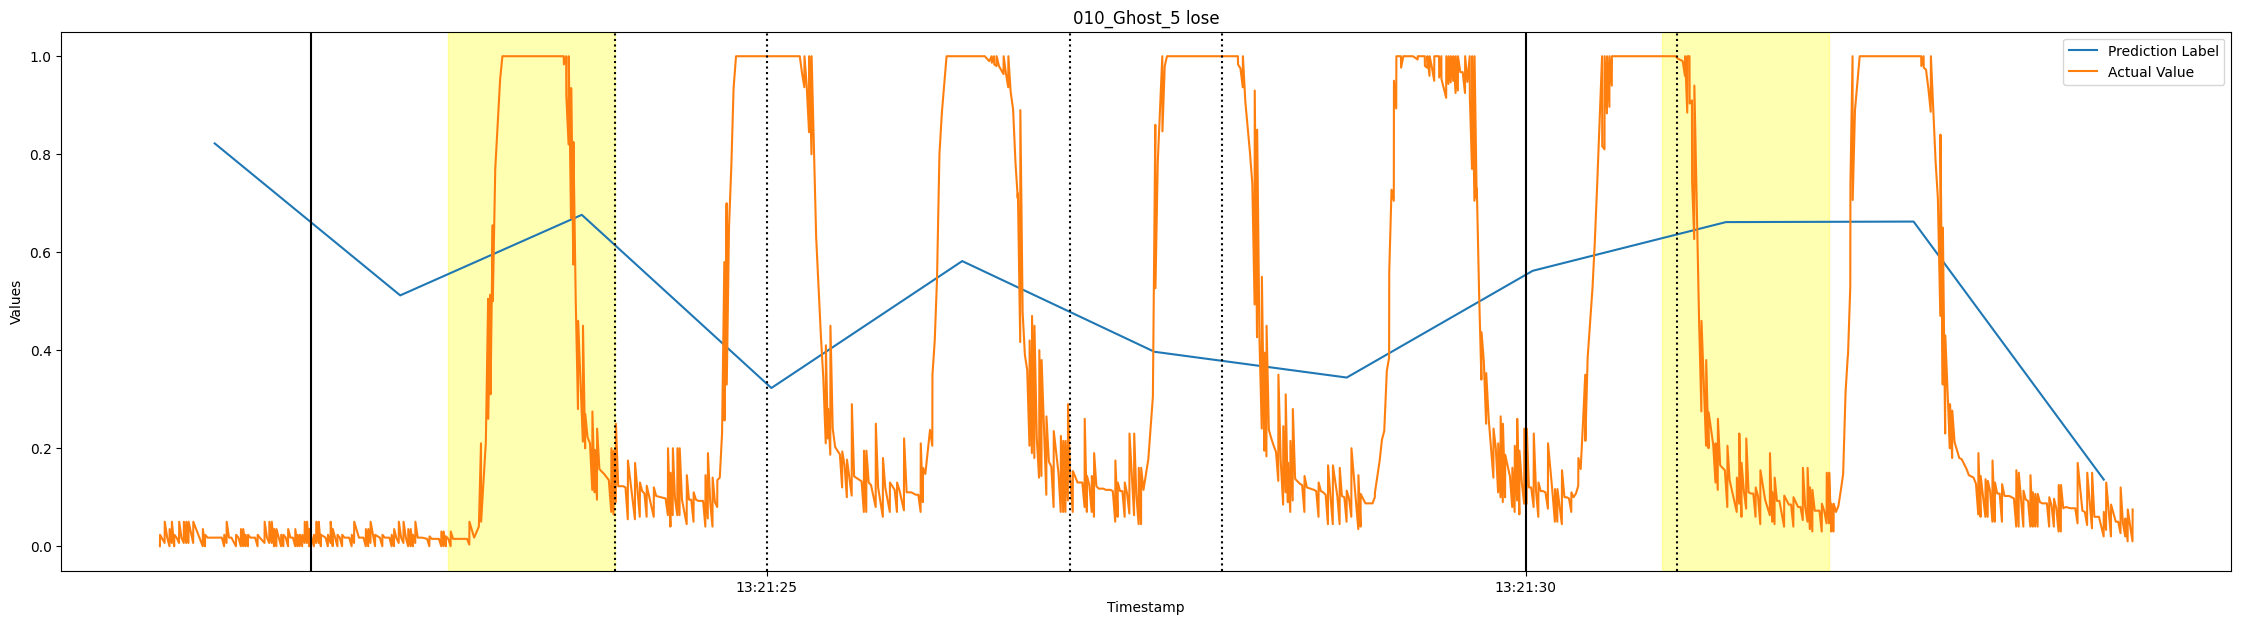

In [53]:
import matplotlib.pyplot as plt

# Find segments separated by specific stim codes
segments = []
i = 0
while i < len(df_game_log) - 1:
    if df_game_log.iloc[i]['stim'] == 1:
        for j in range(i + 1, len(df_game_log)):
            if df_game_log.iloc[j]['stim'] in [30, 31]:
                segments.append((i, j))
                i = j
                break
    elif df_game_log.iloc[i]['stim'] == 4:
        for j in range(i + 1, len(df_game_log)):
            if df_game_log.iloc[j]['stim'] in [70, 71]:
                segments.append((i, j))
                i = j
                break
    i += 1

print(segments)

# Plot the data for each segment
for start_index, end_index in segments:
    start_time_seconds = df_game_log.iloc[start_index]['timestamp']
    end_time_seconds = df_game_log.iloc[end_index]['timestamp']
    
    prediction_segment = df_predictions[(df_predictions['timestamp'] >= start_time_seconds) & (df_predictions['timestamp'] <= end_time_seconds)]
    glove_segment = df_avg_bending[(df_avg_bending['timestamp'] >= start_time_seconds) & (df_avg_bending['timestamp'] <= end_time_seconds)]

    
    plt.figure(figsize=(28, 7))
    plt.plot(prediction_segment['timestamp'], prediction_segment['average'], label='Prediction Label')
    plt.plot(glove_segment['timestamp'], glove_segment['average_bending_sum'], label='Actual Value')
    
    # Draw the vertical lines
    stim_row = df_game_log[(df_game_log['timestamp'] >= start_time_seconds) & (df_game_log['timestamp'] <= end_time_seconds)]
    for k in range(len(stim_row) - 1):
        if stim_row.iloc[k]['stim'] == 2 and stim_row.iloc[k + 1]['stim'] == 21:
            plt.axvline(x=stim_row.iloc[k]['timestamp'], color='black', linestyle='-')
            middle_highlight = stim_row.iloc[k+1]['timestamp']
            start_highlight = middle_highlight - pd.Timedelta(milliseconds=200)
            end_highlight = middle_highlight + pd.Timedelta(milliseconds=1200)
            plt.axvspan(start_highlight, end_highlight, color='yellow', alpha=0.3)
        elif stim_row.iloc[k]['stim'] == 2 and stim_row.iloc[k + 1]['stim'] == 20:
            plt.axvline(x=stim_row.iloc[k]['timestamp'], color='black', linestyle=':')
        elif stim_row.iloc[k]['stim'] == 5 and stim_row.iloc[k + 1]['stim'] == 51:
            plt.axvline(x=stim_row.iloc[k]['timestamp'], color='black', linestyle='-')
            middle_highlight = stim_row.iloc[k+1]['timestamp']
            start_highlight = middle_highlight - pd.Timedelta(milliseconds=100)
            end_highlight = middle_highlight + pd.Timedelta(milliseconds=1000)
            plt.axvspan(start_highlight, end_highlight, color='yellow', alpha=0.3)
        elif stim_row.iloc[k]['stim'] == 5 and stim_row.iloc[k + 1]['stim'] != 51:
            plt.axvline(x=stim_row.iloc[k]['timestamp'], color='black', linestyle=':')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Values')
    if df_game_log.iloc[start_index]['stim'] == 1:
        plt.title(f"{ID}_{df_game_log.iloc[end_index-1]['description']}")
    else:               
        plt.title(f"{ID}_{df_game_log.iloc[end_index]['description']}")
    plt.legend()

    # Save the plot
    # plt.savefig(f"{ID}/{ID}_{df_game_log.iloc[end_index]['description']}_{df_game_log.iloc[start_index]['timestamp']}.png")
    plt.show()
    plt.close()

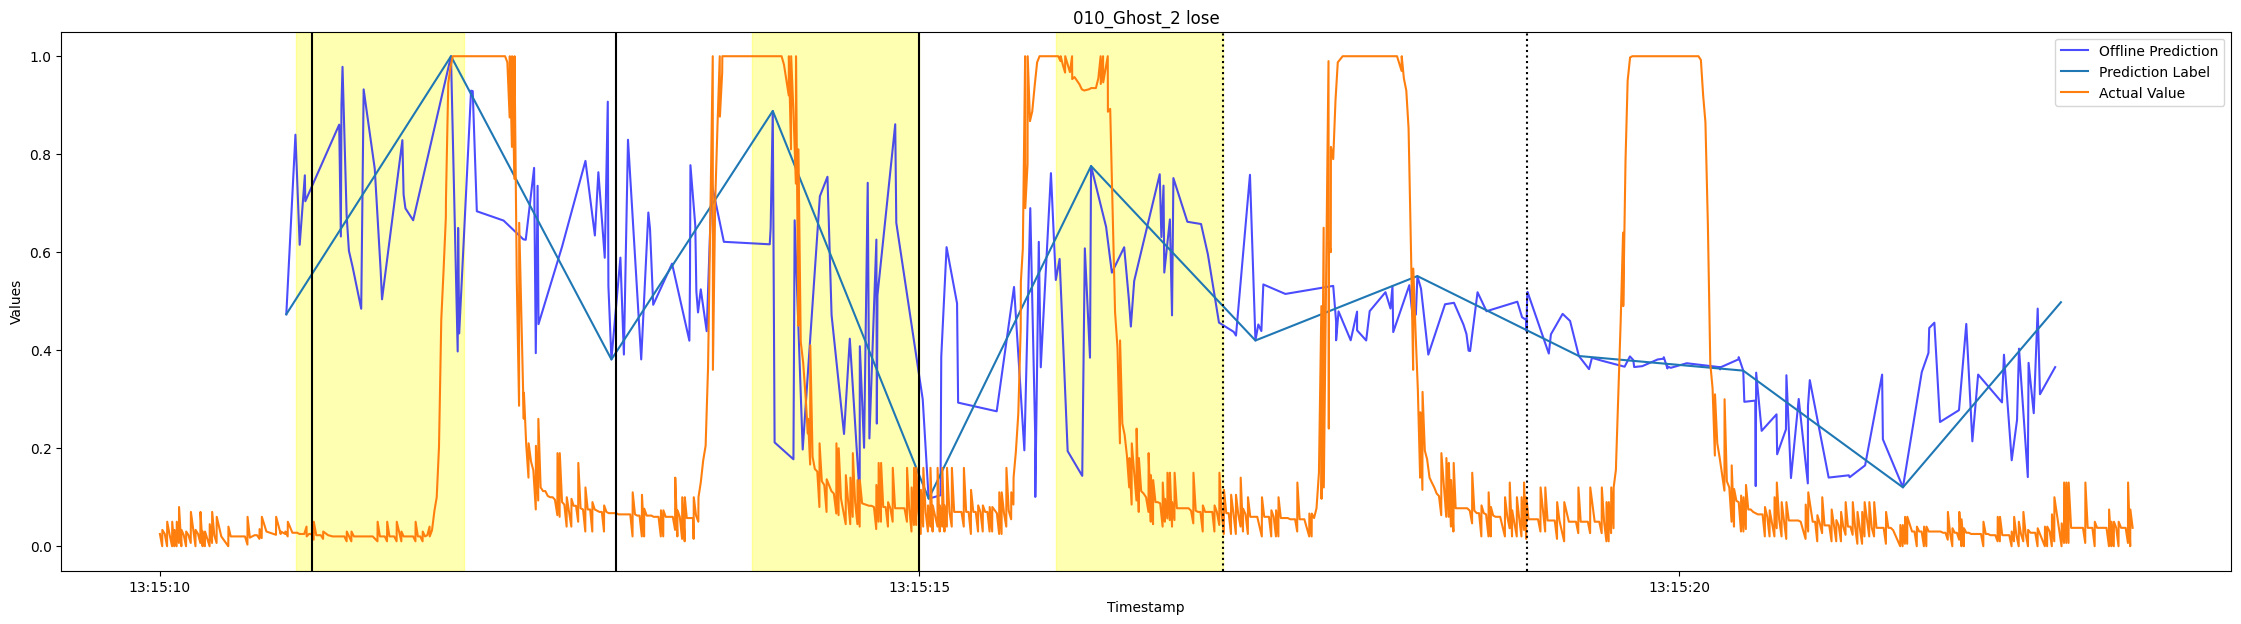

In [57]:
from matplotlib.axes import Axes
import numpy as np

start_index, end_index = (311, 322)

start_time_seconds = df_game_log.iloc[start_index]['timestamp']
end_time_seconds = df_game_log.iloc[end_index]['timestamp']

prediction_segment = df_predictions[(df_predictions['timestamp'] >= start_time_seconds) & (df_predictions['timestamp'] <= end_time_seconds)]
glove_segment = df_avg_bending[(df_avg_bending['timestamp'] >= start_time_seconds) & (df_avg_bending['timestamp'] <= end_time_seconds)]


plt.figure(figsize=(28, 7))

# Create the offline_prediction DataFrame
offline_prediction = pd.DataFrame()

# Iterate through each row in prediction_segment
for i in range(len(prediction_segment) - 1):
    # Extract the current and next rows
    current_row = prediction_segment.iloc[i]
    next_row = prediction_segment.iloc[i + 1]
    
    # Extract the current timestamp and value
    current_timestamp = current_row['timestamp']
    current_value = current_row['average']
    
    # Extract the next timestamp and value
    next_timestamp = next_row['timestamp']
    next_value = next_row['average']
    
    # Generate 20 random millisecond offsets between the current and next timestamps
    random_offsets = np.random.randint(1, int((next_timestamp - current_timestamp).total_seconds() * 1000), size=20)
    random_timestamps = [current_timestamp + pd.Timedelta(milliseconds=offset) for offset in random_offsets]
    
    # Generate random values between the current and next values
    random_values = np.random.uniform(current_value, next_value, size=20)
    
    # Include the current timestamp with the exact current value
    timestamps = [current_timestamp] + random_timestamps
    values = [current_value] + list(random_values)
    
    # Append the generated data to offline_prediction
    temp_df = pd.DataFrame({'timestamp': timestamps, 'prediction_label': values})
    offline_prediction = pd.concat([offline_prediction, temp_df], ignore_index=True)

# Sort the offline_prediction DataFrame by timestamp
offline_prediction = offline_prediction.sort_values(by='timestamp').reset_index(drop=True)

# Plot the offline_prediction on the graph
plt.plot(
    offline_prediction['timestamp'],
    offline_prediction['prediction_label'],
    label='Offline Prediction',
    color='blue',
    alpha=0.7
)

plt.plot(prediction_segment['timestamp'], prediction_segment['average'], label='Prediction Label')
plt.plot(glove_segment['timestamp'], glove_segment['average_bending_sum'], label='Actual Value')

# Draw the vertical lines
stim_row = df_game_log[(df_game_log['timestamp'] >= start_time_seconds) & (df_game_log['timestamp'] <= end_time_seconds)]
for k in range(len(stim_row) - 1):
    if stim_row.iloc[k]['stim'] == 2 and stim_row.iloc[k + 1]['stim'] == 21:
        plt.axvline(x=stim_row.iloc[k]['timestamp'], color='black', linestyle='-')
        middle_highlight = stim_row.iloc[k+1]['timestamp']
        start_highlight = middle_highlight - pd.Timedelta(milliseconds=200)
        end_highlight = middle_highlight + pd.Timedelta(milliseconds=1200)
        plt.axvspan(start_highlight, end_highlight, color='yellow', alpha=0.3)
    elif stim_row.iloc[k]['stim'] == 2 and stim_row.iloc[k + 1]['stim'] == 20:
        plt.axvline(x=stim_row.iloc[k]['timestamp'], color='black', linestyle=':')
    elif stim_row.iloc[k]['stim'] == 5 and stim_row.iloc[k + 1]['stim'] == 51:
        plt.axvline(x=stim_row.iloc[k]['timestamp'], color='black', linestyle='-')
        middle_highlight = stim_row.iloc[k+1]['timestamp']
        start_highlight = middle_highlight - pd.Timedelta(milliseconds=100)
        end_highlight = middle_highlight + pd.Timedelta(milliseconds=1000)
        plt.axvspan(start_highlight, end_highlight, color='yellow', alpha=0.3)
    elif stim_row.iloc[k]['stim'] == 5 and stim_row.iloc[k + 1]['stim'] != 51:
        plt.axvline(x=stim_row.iloc[k]['timestamp'], color='black', linestyle=':')

plt.xlabel('Timestamp')
plt.ylabel('Values')
if df_game_log.iloc[start_index]['stim'] == 1:
    plt.title(f"{ID}_{df_game_log.iloc[end_index-1]['description']}")
else:               
    plt.title(f"{ID}_{df_game_log.iloc[end_index]['description']}")
plt.legend()

# Save the plot
# plt.savefig(f"{ID}/{ID}_{df_game_log.iloc[end_index]['description']}_{df_game_log.iloc[start_index]['timestamp']}.png")
plt.show()
plt.close()